In [1]:
import os, datetime, time, re, warnings, gc, json, random, yaml, pickle

from contextlib import contextmanager

import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
from pandas.core.common import SettingWithCopyWarning

from sklearn.cluster import MiniBatchKMeans

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)

pd.set_option("display.width", 1000)
pd.set_option("display.max_columns", 256)
pd.set_option("display.max_rows", 256)

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Noto Sans CJK JP']

In [2]:
def focus_usage(df, weight=100):
    df["事務所"] = df["事務所"] * weight
    df["体育館"] = df["体育館"] * weight
    df["保育所"] = df["保育所"] * weight
    df["個人住宅"] = df["個人住宅"] * weight
    df["卸売市場"] = df["卸売市場"] * weight
    df["商業施設"] = df["商業施設"] * weight
    df["大学"] = df["大学"] * weight
    df["娯楽施設"] = df["娯楽施設"] * weight
    df["宿泊施設"] = df["宿泊施設"] * weight
    df["廃棄物処理場"] = df["廃棄物処理場"] * weight
    df["教育施設"] = df["教育施設"] * weight
    df["物流施設"] = df["物流施設"] * weight
    df["物販店舗"] = df["物販店舗"] * weight
    df["生産施設"] = df["生産施設"] * weight
    df["病院施設"] = df["病院施設"] * weight
    df["発電所"] = df["発電所"] * weight
    df["看板"] = df["看板"] * weight
    df["研修施設"] = df["研修施設"] * weight
    df["研究施設"] = df["研究施設"] * weight
    df["社寺教会"] = df["社寺教会"] * weight
    df["福祉施設"] = df["福祉施設"] * weight
    df["集合住宅"] = df["集合住宅"] * weight
    df["飲食店"] = df["飲食店"] * weight
    df["駐車場"] = df["駐車場"] * weight
    
    return df

In [3]:
df = pd.read_pickle("./structure_df_01.pkl")
df.head()

,no,name,usage,place,floor_area,floor,structure_type,pref_code,country_code,floor_1,floor_2,floor_3,k_class
0,79 07B198B,（仮称）ＨＴＣ技術センター新築工事,研究施設,神奈川県横浜市都筑区,22214.97,1-6-0,SC造,14,392,1,6,0,9
1,79 08B250B,国立音楽大学新校舎建設工事,大学,東京都立川市,17277.40,0-0-0,RC造,13,392,0,0,0,0
2,79 09A245A,八幡大神社楼門新築計画,社寺教会,東京都三鷹市,30.12,0-1-0,W造,13,392,0,1,0,2
3,75 09A014,デンカ生研鏡田工場５５号棟建設工事,事務所,新潟県五泉市,3400.00,0-3-0,S造,15,392,0,3,0,2
4,93 09A002,ホンダ・タイ工場環境試験室増設工事,生産施設,海外タイ アユタヤ県,500.00,0-0-0,RC造,55,764,0,0,0,1


### 処理済み特徴量の読み込み

In [4]:
train = pd.read_pickle("./structure_train_01.pkl")
train = focus_usage(train)

In [5]:
kmeans = MiniBatchKMeans(n_clusters=10, random_state=42)
kmeans.fit(train)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

### 分類結果を分析用のデータに反映

In [6]:
df["k_class"] = kmeans.predict(train)

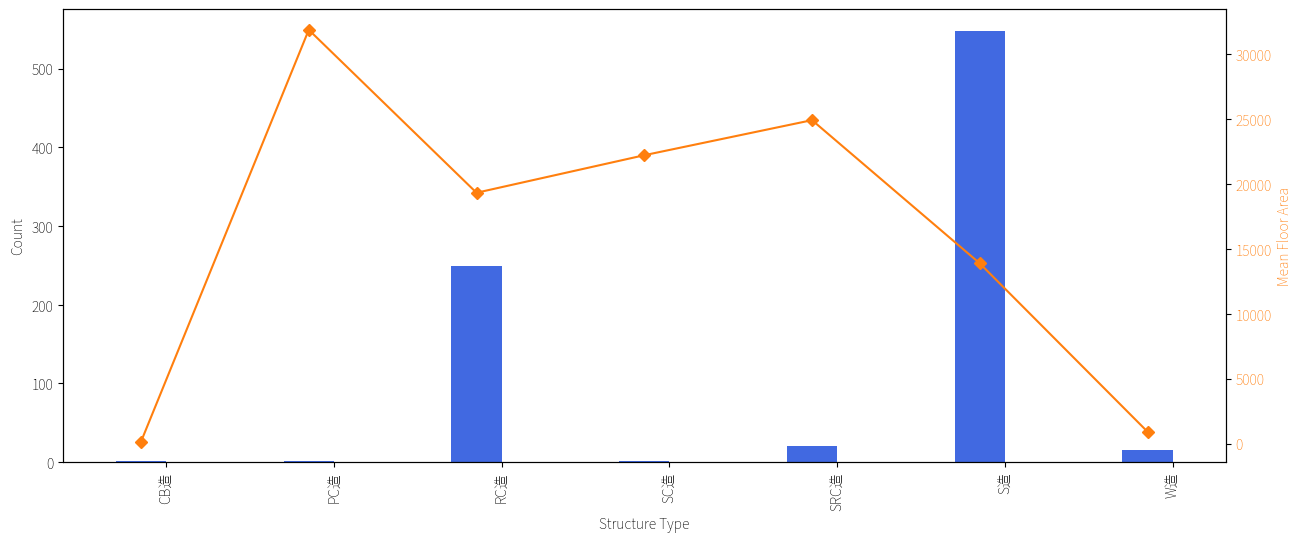

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(15, 6), dpi=100)
tt = df.groupby("structure_type").size().values
ind = np.arange(len(tt))
width = 0.3

b = axes.bar(ind, tt, width, color='royalblue')
axes.set_ylabel("Count");
axes.set_xlabel("Structure Type");
axes.set_xticks(ind + width / 2)
axes.set_xticklabels(np.sort(df["structure_type"].unique()), rotation=90)

axes2 = axes.twinx()
axes2.plot(ind, df.groupby("structure_type")["floor_area"].mean(), 'D-', color='tab:orange', label='Mean Floor Area');
axes2.grid(False);
axes2.tick_params(axis='y', labelcolor='tab:orange');
axes2.set_ylabel('Mean Floor Area', color='tab:orange');

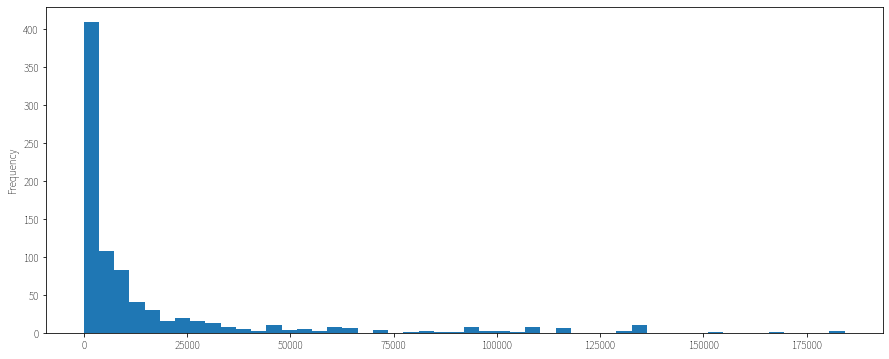

In [8]:
plt.rc('figure', figsize=(15, 6))
df["floor_area"].plot.hist(bins=50)

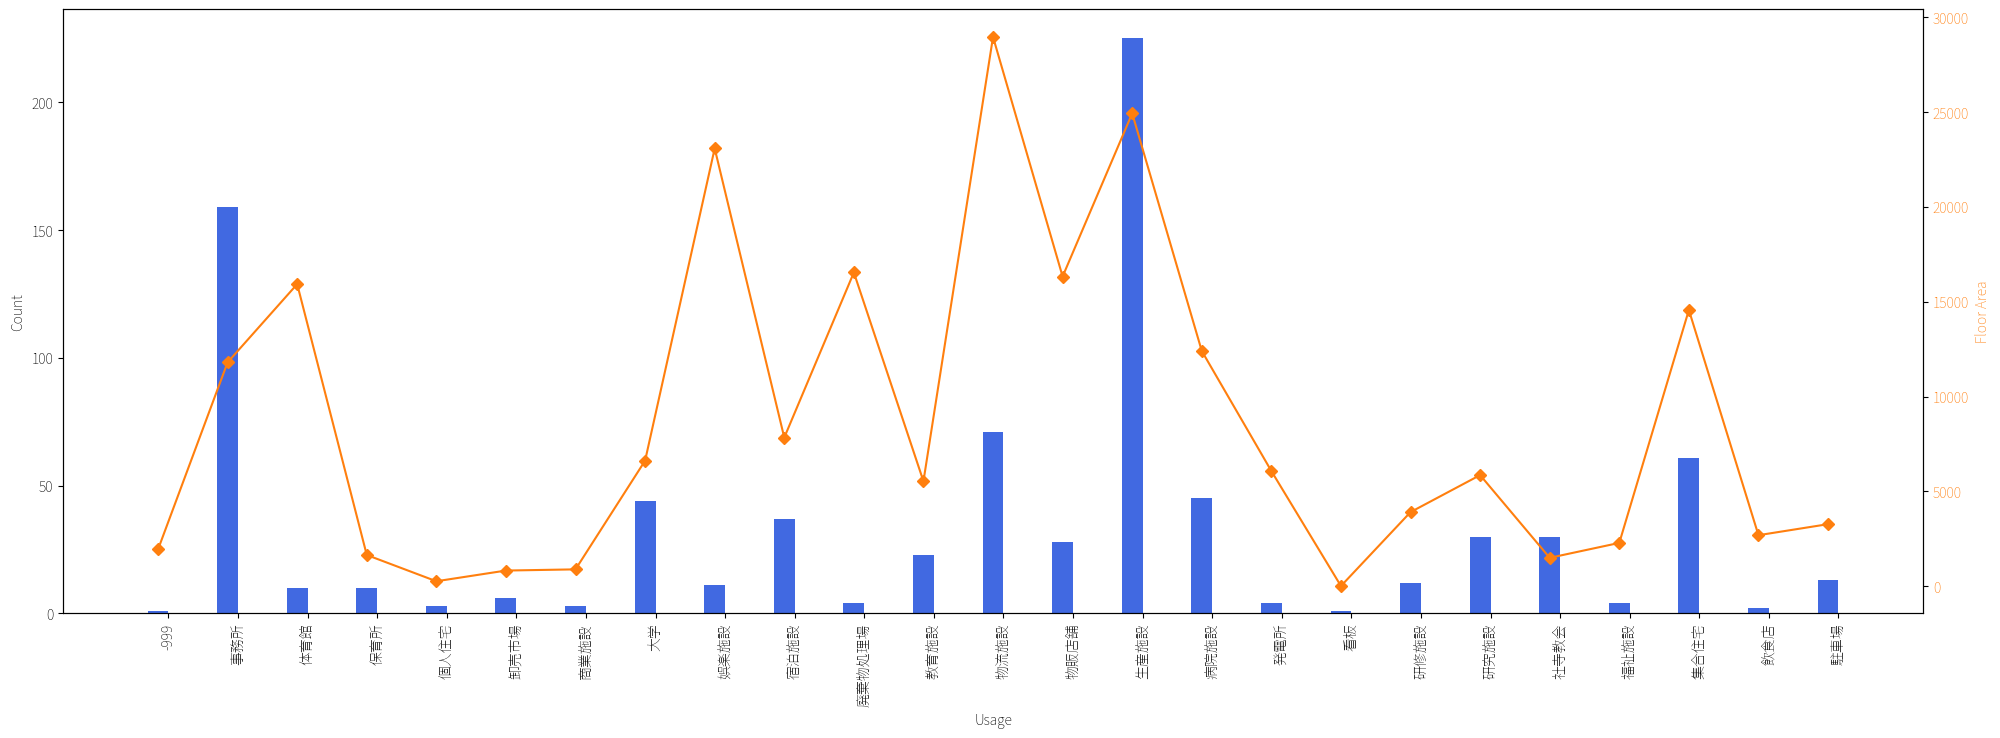

In [9]:
fig, axes = plt.subplots(1, 1, figsize=(24, 8), dpi=100)
df["usage"] = df["usage"].astype(str)
tt = df.groupby("usage").size().values
ind = np.arange(len(tt))
width = 0.3

b = axes.bar(ind, tt, width, color='royalblue')
axes.set_ylabel("Count");
axes.set_xlabel("Usage");
axes.set_xticks(ind + width / 2)
axes.set_xticklabels(np.sort(df["usage"].unique()), rotation=90)

axes2 = axes.twinx()
axes2.plot(ind, df.groupby("usage")["floor_area"].mean(), 'D-', color='tab:orange', label='Mean Floor Area');
axes2.grid(False);
axes2.tick_params(axis='y', labelcolor='tab:orange');
axes2.set_ylabel('Floor Area', color='tab:orange');

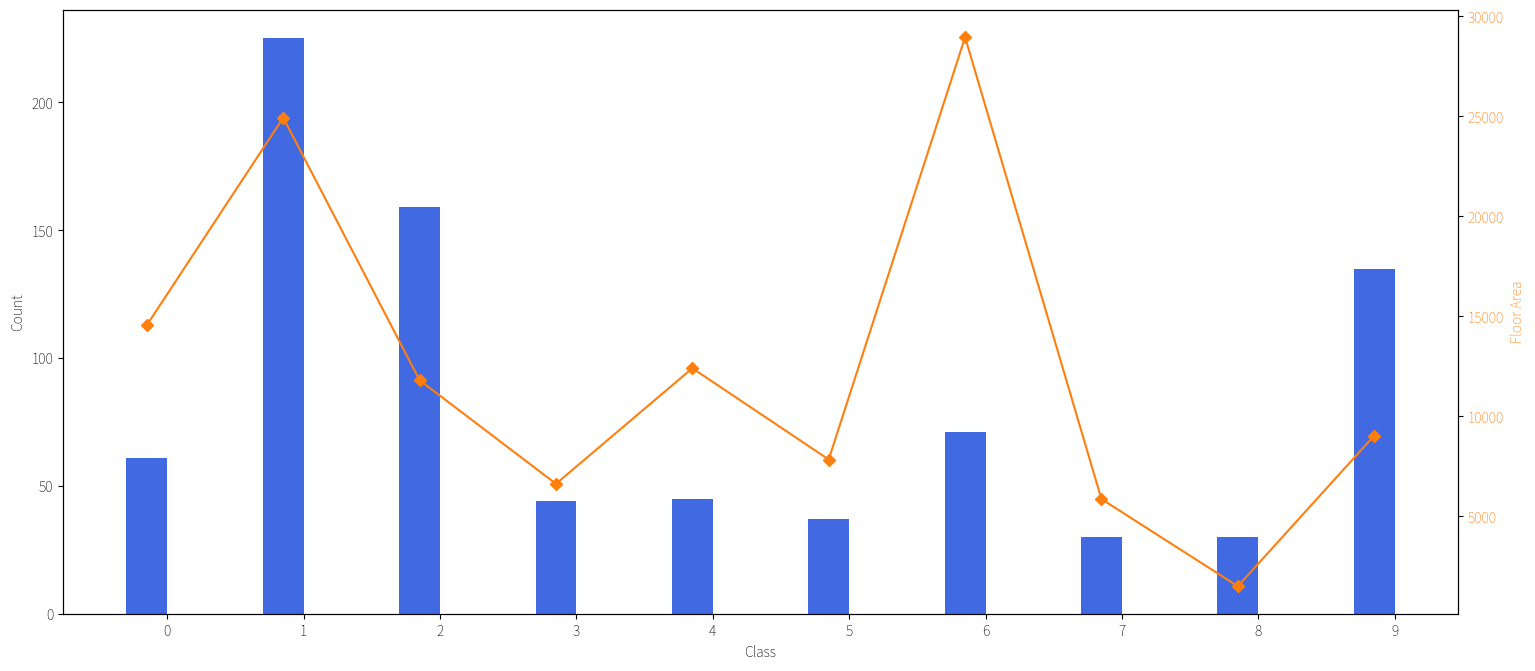

In [10]:
fig, axes = plt.subplots(1, 1, figsize=(18, 8), dpi=100)
tt = df.groupby("k_class").size().values
ind = np.arange(len(tt))
width = 0.3

b = axes.bar(ind, tt, width, color='royalblue')
axes.set_ylabel("Count");
axes.set_xlabel("Class");
axes.set_xticks(ind + width / 2)
axes.set_xticklabels(np.sort(df["k_class"].unique()), rotation=0)

axes2 = axes.twinx()
axes2.plot(ind, df.groupby("k_class")["floor_area"].mean(), 'D-', color='tab:orange', label='Mean Floor Area');
axes2.grid(False);
axes2.tick_params(axis='y', labelcolor='tab:orange');
axes2.set_ylabel('Floor Area', color='tab:orange');

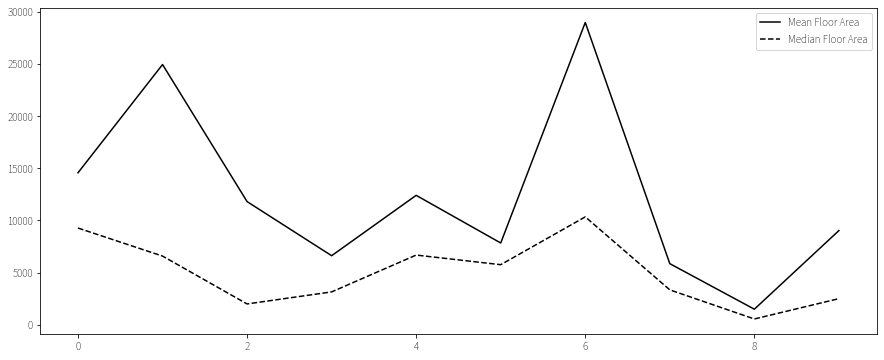

In [11]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(df.groupby("k_class")["floor_area"].mean(), 'k', label='Mean Floor Area')
ax.plot(df.groupby("k_class")["floor_area"].median(), 'k--', label='Median Floor Area')
ax.legend(loc='best')

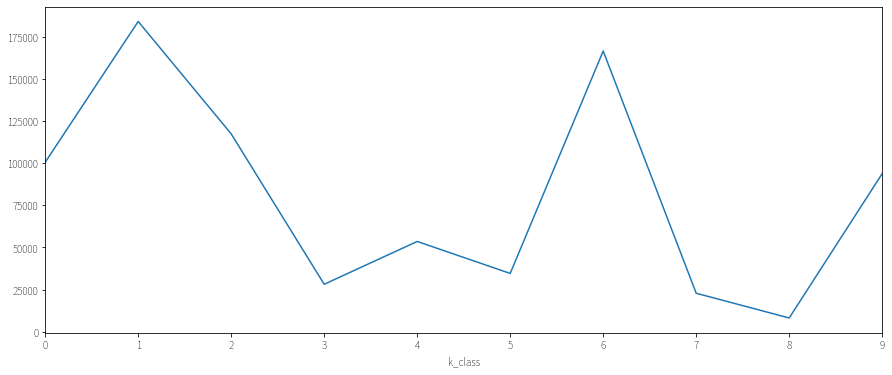

In [12]:
tmp = df.groupby("k_class").agg({"floor_area": ["min", "max"]})
tmp["diff"] = tmp[("floor_area", "max")] - tmp[("floor_area", "min")]
tmp["diff"].plot()

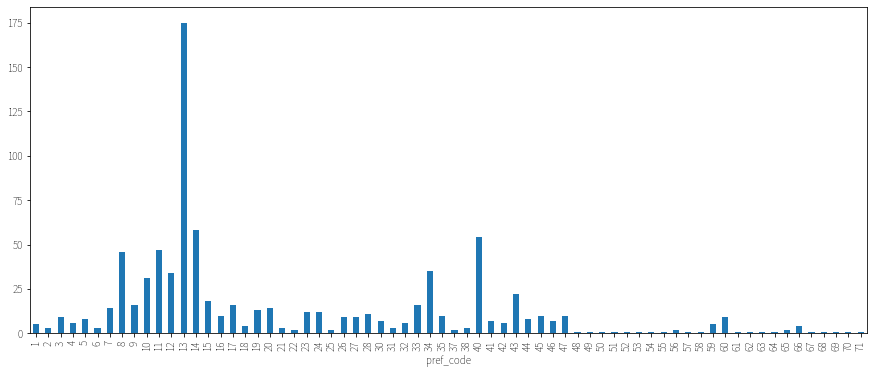

In [13]:
df.groupby("pref_code").size().plot.bar()

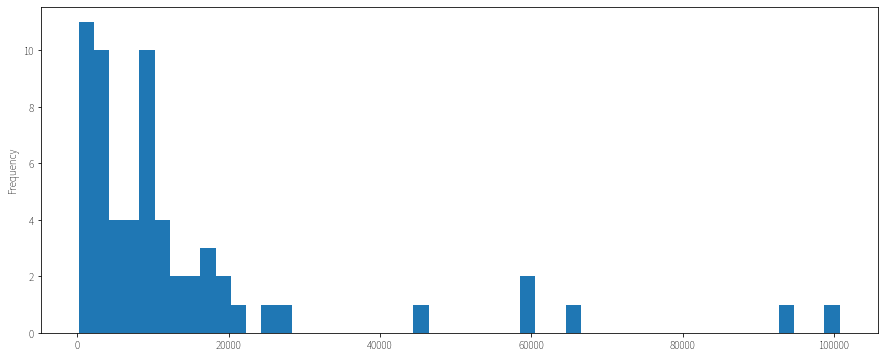

In [14]:
df[df["k_class"]==0]["floor_area"].plot.hist(bins=50)

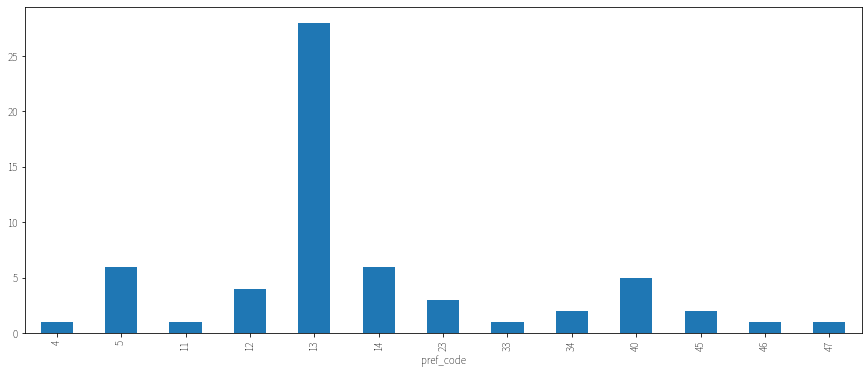

In [15]:
df[df["k_class"]==0].groupby("pref_code").size().plot.bar()

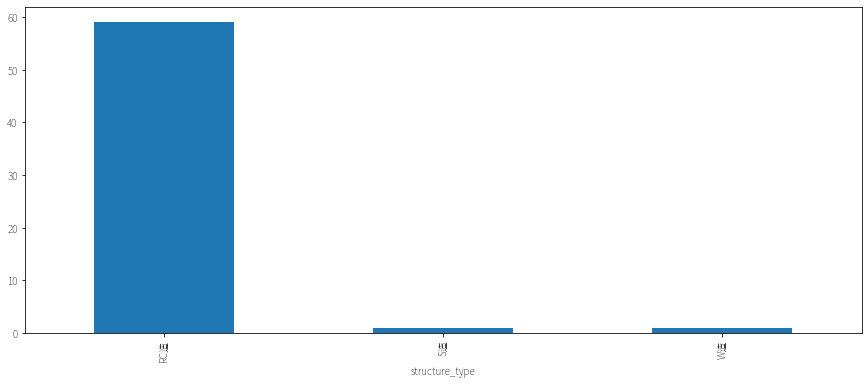

In [16]:
df[df["k_class"]==0].groupby("structure_type").size().plot.bar()

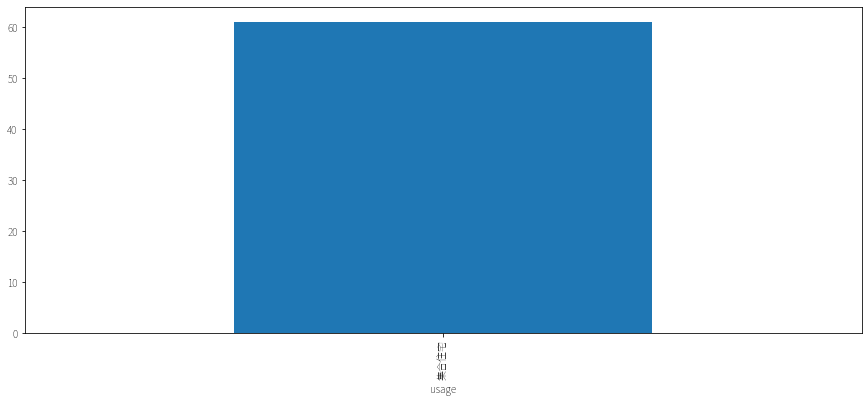

In [17]:
df[df["k_class"]==0].groupby("usage").size().plot.bar()

In [18]:
df[df["k_class"]==0]

,no,name,usage,place,floor_area,floor,structure_type,pref_code,country_code,floor_1,floor_2,floor_3,k_class
5,79 04B878C,市川一丁目計画（テナント対応）,集合住宅,千葉県市川市,7218.81,1-13-0,RC造,12,392,1,13,0,0
39,79 09A116B,国際神南ビル建替計画,集合住宅,東京都渋谷区,1350.90,0-9-0,RC造,13,392,0,9,0,0
50,79 09B514A,大和ハウス工業 南青山六丁目計画,集合住宅,東京都港区,13783.21,2-8-0,RC造,13,392,2,8,0,0
60,79 10A437A,※東急瀬田四丁目計画,集合住宅,東京都世田谷区,3404.54,1-3-0,RC造,13,392,1,3,0,0
65,79 08B372B,ＮＴＴ都市開発 南麻布５丁目計画,集合住宅,東京都港区,9270.07,1-5-1,RC造,13,392,1,5,0,0
75,74 10A011,ウエルライフ３号館新築工事,集合住宅,宮崎県都城市,9954.40,0-4-0,RC造,45,392,0,4,0,0
86,79 10A169B,（仮称）新子安計画,集合住宅,神奈川県横浜市神奈川区,10828.17,1-7-0,RC造,14,392,1,7,0,0
112,79 09B263A,南麻布１丁目計画,集合住宅,東京都港区,2306.78,0-12-0,RC造,13,392,0,12,0,0
113,79 09B264A,狸穴マンション計画,集合住宅,東京都港区,18161.34,2-8-0,RC造,13,392,2,8,0,0
117,79 10A448A,板橋東新町共同住宅計画,集合住宅,東京都板橋区,1833.64,0-5-0,RC造,13,392,0,5,0,0


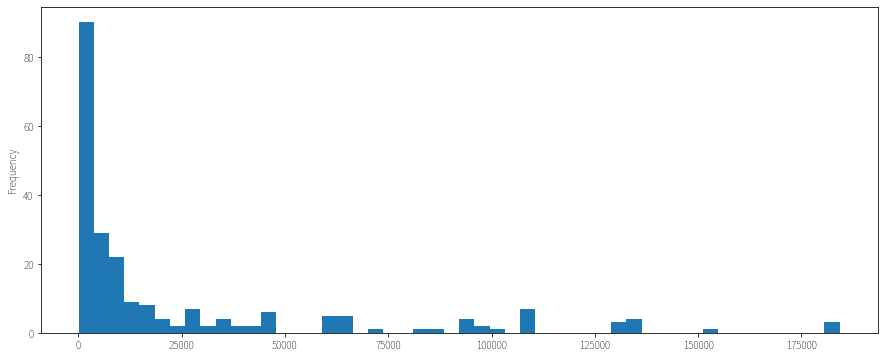

In [19]:
df[df["k_class"]==1]["floor_area"].plot.hist(bins=50)

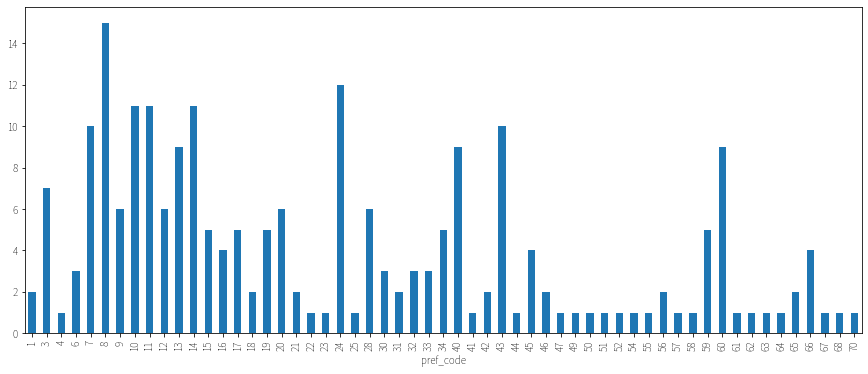

In [20]:
df[df["k_class"]==1].groupby("pref_code").size().plot.bar()

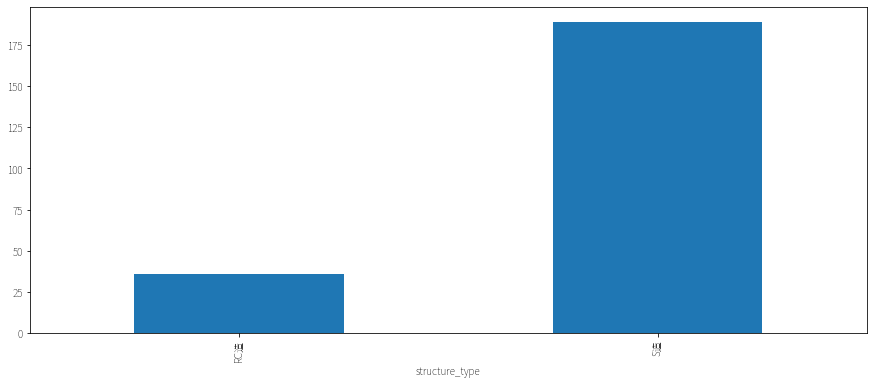

In [21]:
df[df["k_class"]==1].groupby("structure_type").size().plot.bar()

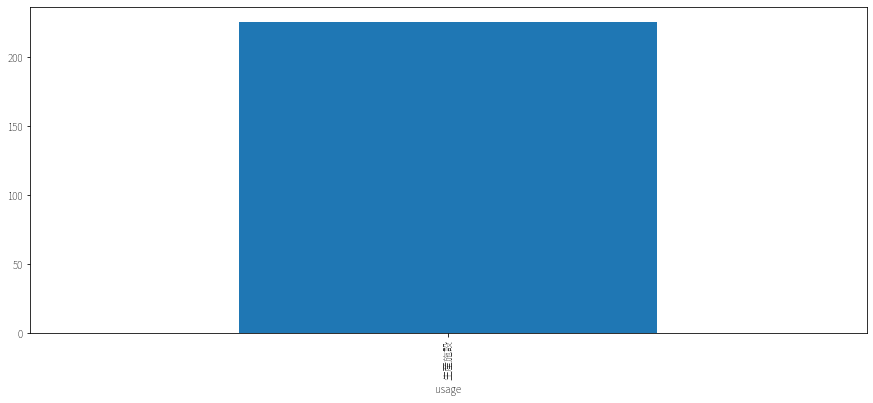

In [22]:
df[df["k_class"]==1].groupby("usage").size().plot.bar()

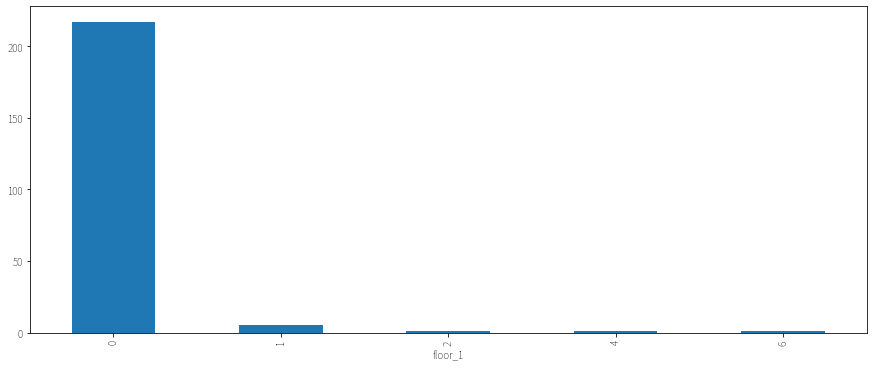

In [23]:
df[df["k_class"]==1].groupby("floor_1").size().plot.bar()

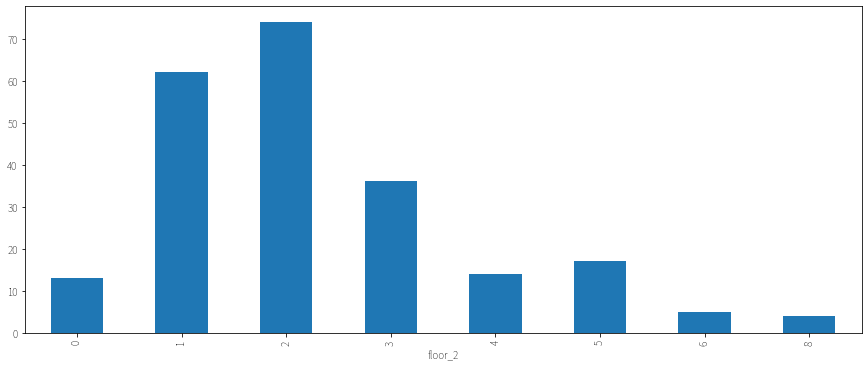

In [24]:
df[df["k_class"]==1].groupby("floor_2").size().plot.bar()

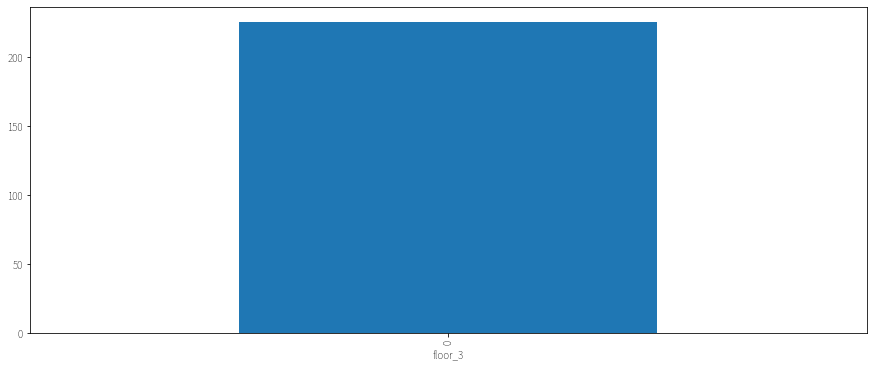

In [25]:
df[df["k_class"]==1].groupby("floor_3").size().plot.bar()

In [26]:
df[df["k_class"]==1]

,no,name,usage,place,floor_area,floor,structure_type,pref_code,country_code,floor_1,floor_2,floor_3,k_class
4,93 09A002,ホンダ・タイ工場環境試験室増設工事,生産施設,海外タイ アユタヤ県,500.00,0-0-0,RC造,55,764,0,0,0,1
12,74 09A089,熊本工機本社工場荷捌き場新築工事,生産施設,熊本県玉名郡南関町大字四ﾂ原1280,110.00,0-1-0,S造,43,392,0,1,0,1
21,93 09A037,Ｐ＆ＧベトナムＢｅｎＣａｔ工場新築工事,生産施設,海外ベトナム ビンドゥオン,15900.00,0-2-0,S造,63,704,0,2,0,1
40,72 09A031A,大山町農産物処理加工施設建設（実施）,生産施設,鳥取県西伯郡大山町,491.57,0-1-0,S造,31,392,0,1,0,1
42,93 09A012,アーレスティ広州金型工場建設工事,生産施設,海外中国 広東省,2520.00,0-1-0,RC造,68,156,0,1,0,1
45,74 09A031,トヨタリック完成ヤード上屋新設工事上,生産施設,福岡県宮若市,4000.00,0-1-0,S造,40,392,0,1,0,1
52,74 10A022,ニチレイロジ九州曽於物流センター新築工事,生産施設,鹿児島県曽於市,8666.46,0-1-0,S造,46,392,0,1,0,1
58,75 10A038,コマツ粟津工場パワートレイン試験棟建設工,生産施設,石川県小松市符津町ツ 23,6244.00,0-2-0,S造,17,392,0,2,0,1
66,79 09B459B,君津製鋼スラグ処理場密閉化建家工事,生産施設,千葉県君津市,3834.62,0-1-0,S造,12,392,0,1,0,1
67,72 08B029B,幸陽船渠（株）塗装・ブラスト工場新築工事,生産施設,広島県三原市,11138.40,0-2-0,S造,34,392,0,2,0,1


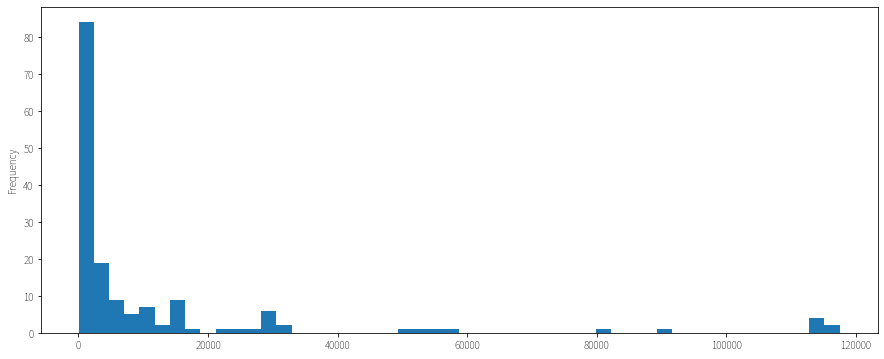

In [27]:
df[df["k_class"]==2]["floor_area"].plot.hist(bins=50)

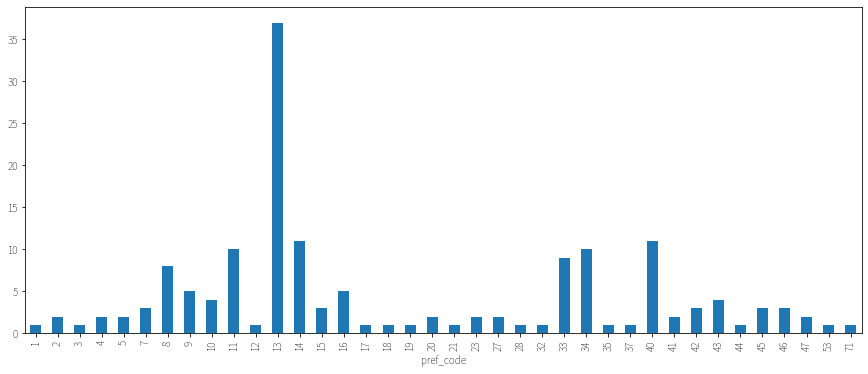

In [28]:
df[df["k_class"]==2].groupby("pref_code").size().plot.bar()

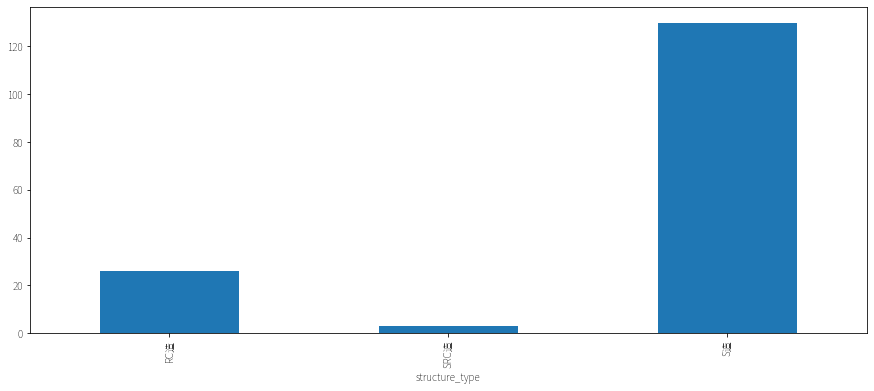

In [29]:
df[df["k_class"]==2].groupby("structure_type").size().plot.bar()

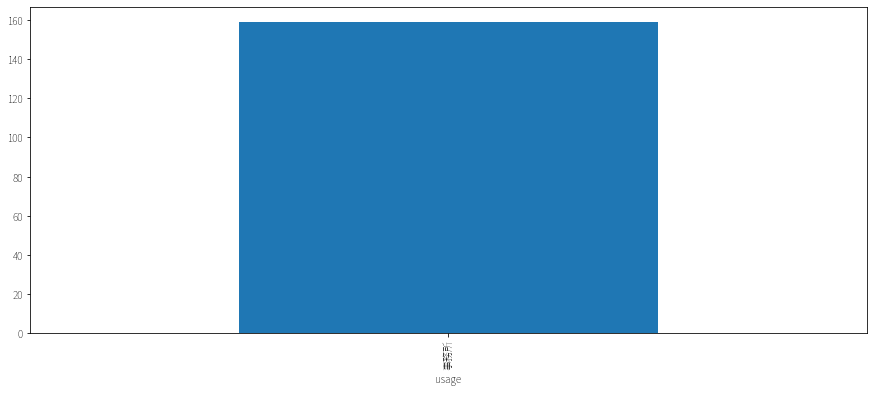

In [30]:
df[df["k_class"]==2].groupby("usage").size().plot.bar()

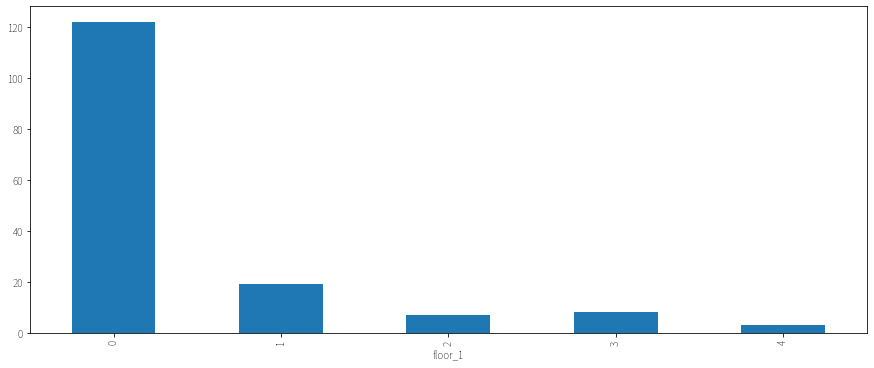

In [31]:
df[df["k_class"]==2].groupby("floor_1").size().plot.bar()

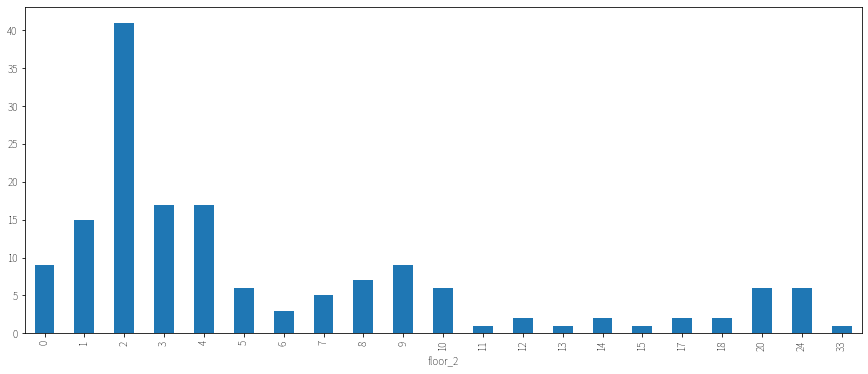

In [32]:
df[df["k_class"]==2].groupby("floor_2").size().plot.bar()

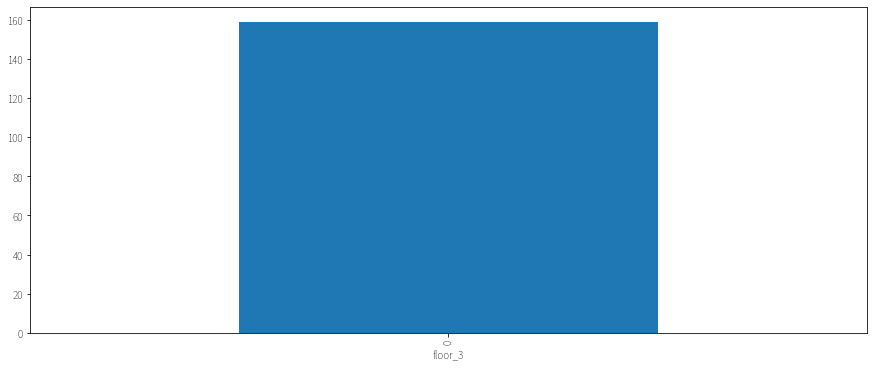

In [33]:
df[df["k_class"]==2].groupby("floor_3").size().plot.bar()

In [34]:
df[df["k_class"]==2]

,no,name,usage,place,floor_area,floor,structure_type,pref_code,country_code,floor_1,floor_2,floor_3,k_class
3,75 09A014,デンカ生研鏡田工場５５号棟建設工事,事務所,新潟県五泉市,3400.000,0-3-0,S造,15,392,0,3,0,2
15,79 09B033B,シャープ福山第２センタービル計画,事務所,広島県福山市,10000.000,0-5-0,S造,34,392,0,5,0,2
18,74 08B005A,宮崎県民共済自社ビル（設計変更対応）,事務所,宮崎県宮崎市宮脇町１２７−１,3000.000,0-5-0,RC造,45,392,0,5,0,2
19,79 09A190B,京橋三丁目プロジェクト,事務所,東京都中央区,117460.960,4-24-0,S造,13,392,4,24,0,2
20,79 09A276B,日本ガス協会ビル建替事業,事務所,東京都港区,7477.290,1-9-1,S造,13,392,1,9,0,2
26,79 09A396A,東芝府中事業所１２Ａ棟新築工事,事務所,東京都府中市,32301.000,0-4-0,S造,13,392,0,4,0,2
27,70 09A014,百五銀行豊田支店計画,事務所,愛知県豊田市,744.840,0-2-0,RC造,23,392,0,2,0,2
32,75 09A013,立業社グループ社屋新築工事,事務所,富山県富山市,2037.000,0-4-1,S造,16,392,0,4,0,2
37,75 09A003,石川日産加賀店建替計画,事務所,石川県加賀市,786.000,0-1-0,S造,17,392,0,1,0,2
38,79 08B173A,川崎御幸ビルディング建替計画,事務所,神奈川県川崎市川崎区,6690.800,1-9-1,S造,14,392,1,9,0,2


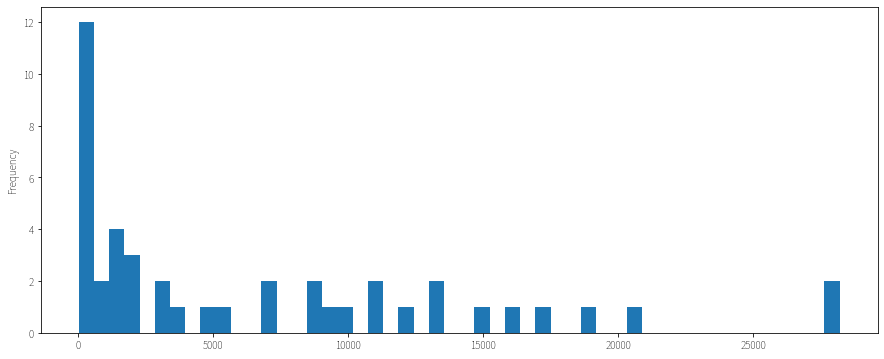

In [35]:
df[df["k_class"]==3]["floor_area"].plot.hist(bins=50)

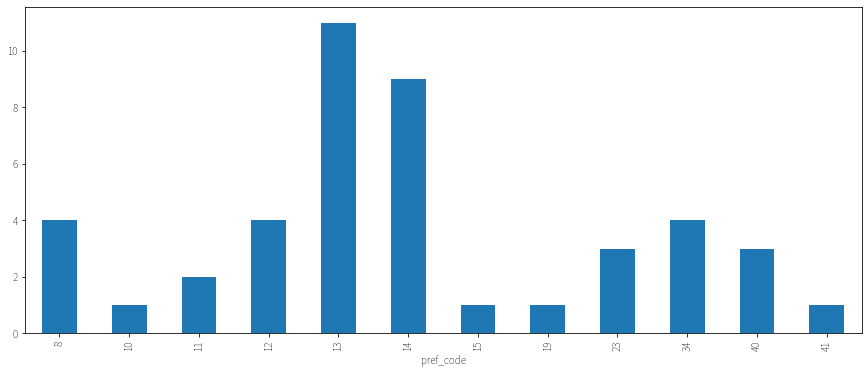

In [36]:
df[df["k_class"]==3].groupby("pref_code").size().plot.bar()

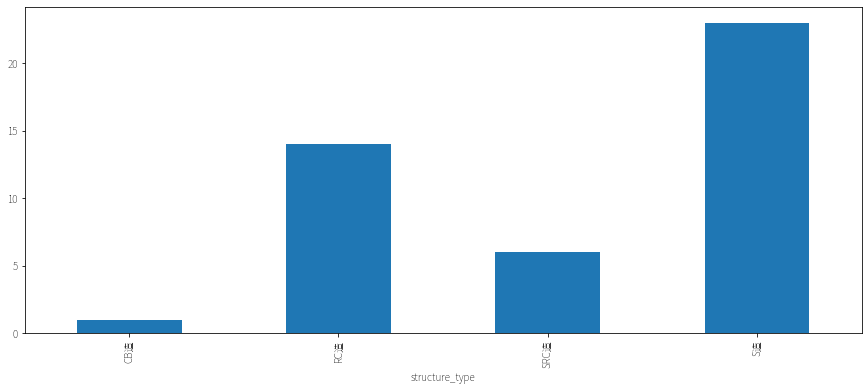

In [37]:
df[df["k_class"]==3].groupby("structure_type").size().plot.bar()

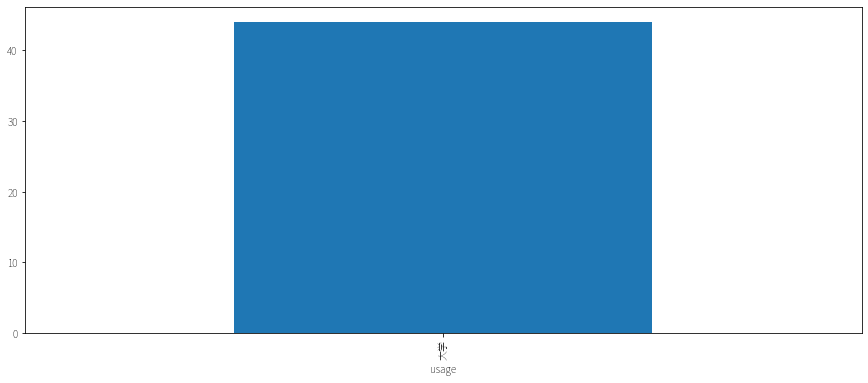

In [38]:
df[df["k_class"]==3].groupby("usage").size().plot.bar()

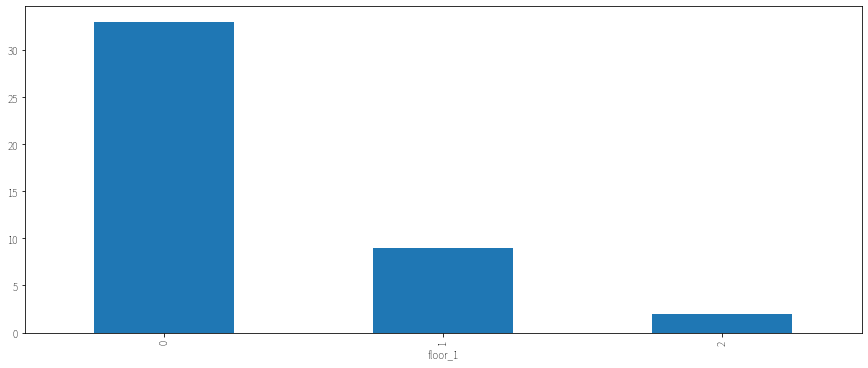

In [39]:
df[df["k_class"]==3].groupby("floor_1").size().plot.bar()

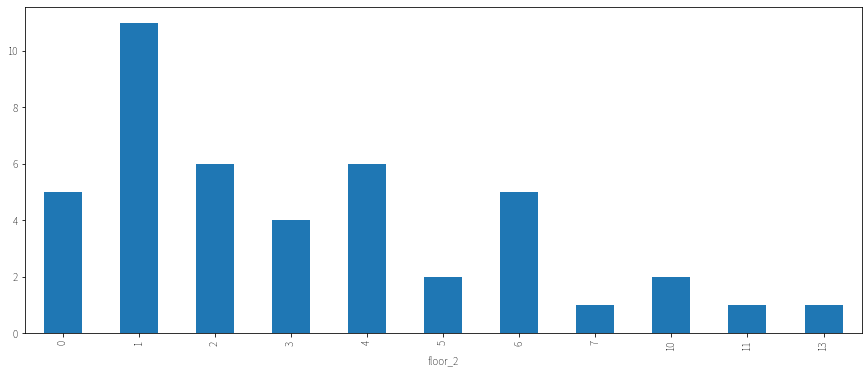

In [40]:
df[df["k_class"]==3].groupby("floor_2").size().plot.bar()

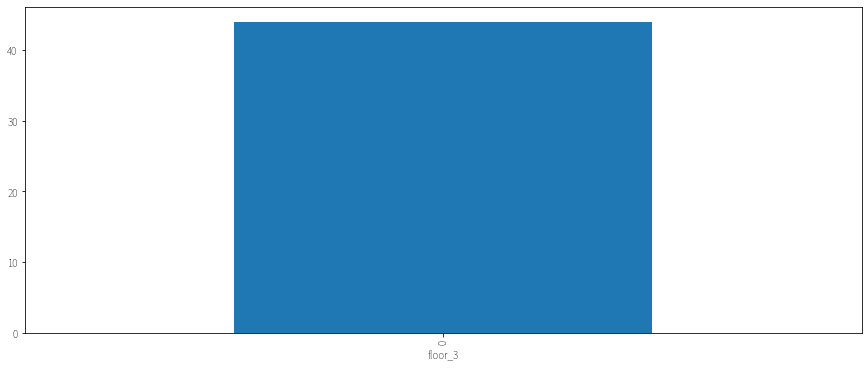

In [41]:
df[df["k_class"]==3].groupby("floor_3").size().plot.bar()

In [42]:
df[df["k_class"]==3]

,no,name,usage,place,floor_area,floor,structure_type,pref_code,country_code,floor_1,floor_2,floor_3,k_class
1,79 08B250B,国立音楽大学新校舎建設工事,大学,東京都立川市,17277.40,0-0-0,RC造,13,392,0,0,0,3
9,79 08B129F,慶應義塾（矢上Ｆ）テクロノジー棟新築,大学,神奈川県横浜市港北区,1895.78,0-3-0,RC造,14,392,0,3,0,3
11,79 06B190B,上野学園ホール棟テナントＡ対応,大学,東京都台東区,15948.79,2-13-0,SRC造,13,392,2,13,0,3
22,79 08B129J,慶應義塾（矢上Ｊ）付属棟移転①（自工研）,大学,神奈川県横浜市港北区,125.00,0-1-0,RC造,14,392,0,1,0,3
30,79 05A520F,目黒星美学園学校１期家具工事２,大学,東京都世田谷区,13000.00,0-0-0,S造,13,392,0,0,0,3
103,79 09B091B,鎌倉女子大学キャンパス整備計画（大船）,大学,神奈川県鎌倉市,3691.21,0-6-0,RC造,14,392,0,6,0,3
110,79 09B008C,流通経済大学弓道場建替計画,大学,茨城県龍ケ崎市,143.85,0-1-0,S造,8,392,0,1,0,3
111,79 08B129O,慶應（矢上Ｏ）付属棟移転②（３６Ａ・ゴミ,大学,神奈川県横浜市港北区,250.00,0-1-0,CB造,14,392,0,1,0,3
134,79 10A178B,麗澤大学スチューデントプラザ整備計画,大学,千葉県柏市,1000.00,0-1-0,S造,12,392,0,1,0,3
158,79 08B129M,慶應義塾（矢上Ｍ）ＣＥ棟,大学,神奈川県横浜市港北区,10913.00,0-0-0,S造,14,392,0,0,0,3


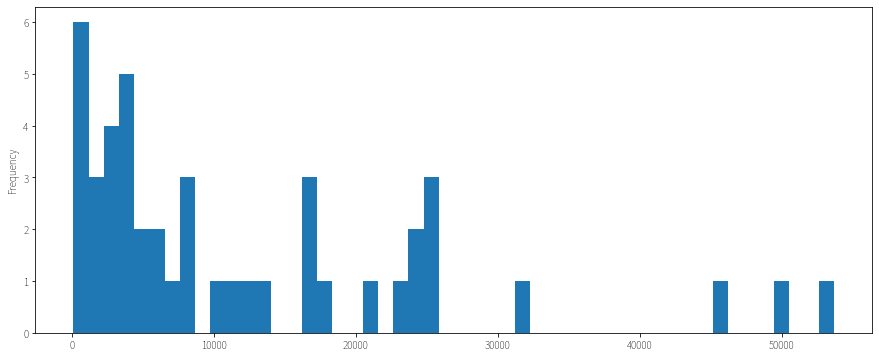

In [43]:
df[df["k_class"]==4]["floor_area"].plot.hist(bins=50)

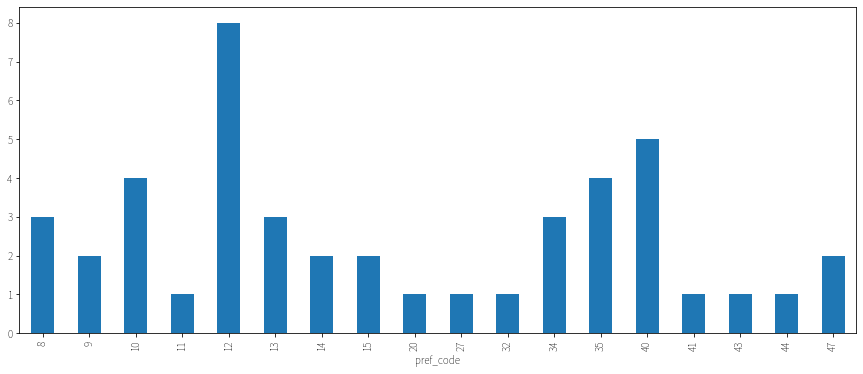

In [44]:
df[df["k_class"]==4].groupby("pref_code").size().plot.bar()

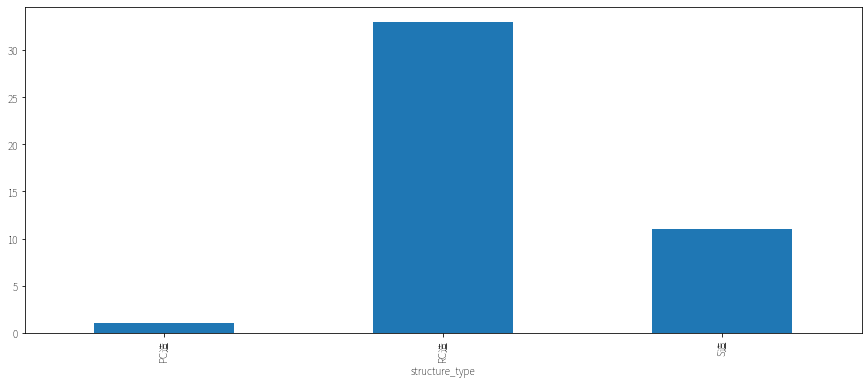

In [45]:
df[df["k_class"]==4].groupby("structure_type").size().plot.bar()

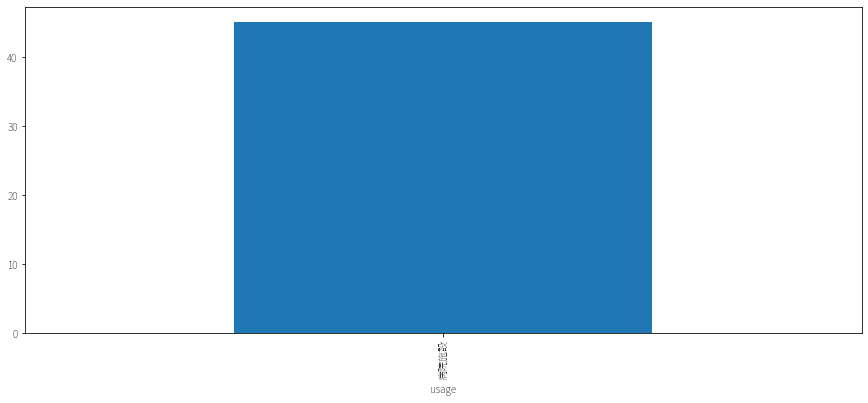

In [46]:
df[df["k_class"]==4].groupby("usage").size().plot.bar()

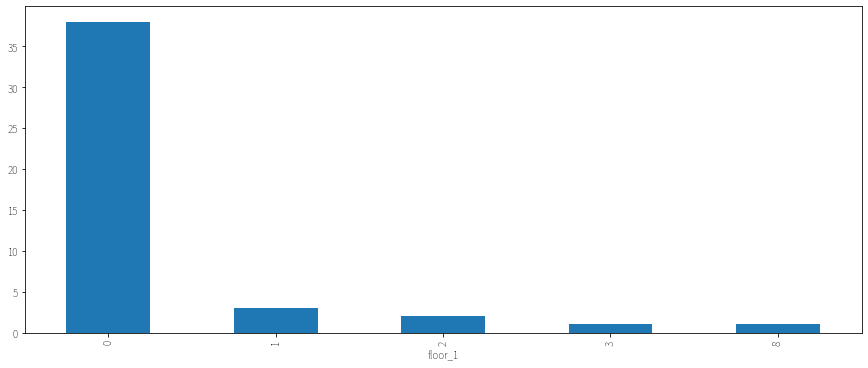

In [47]:
df[df["k_class"]==4].groupby("floor_1").size().plot.bar()

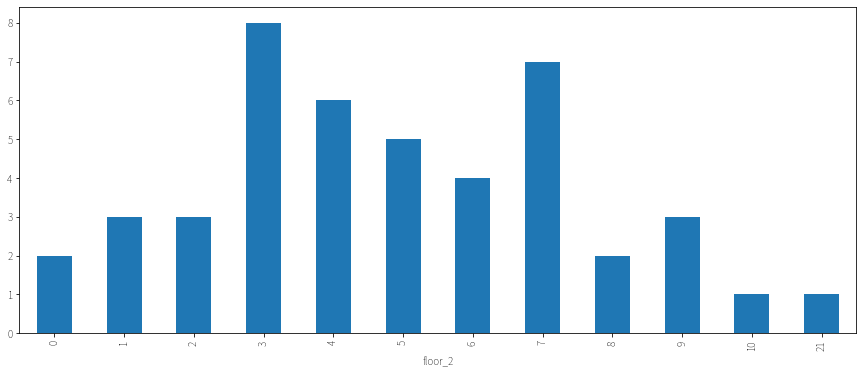

In [48]:
df[df["k_class"]==4].groupby("floor_2").size().plot.bar()

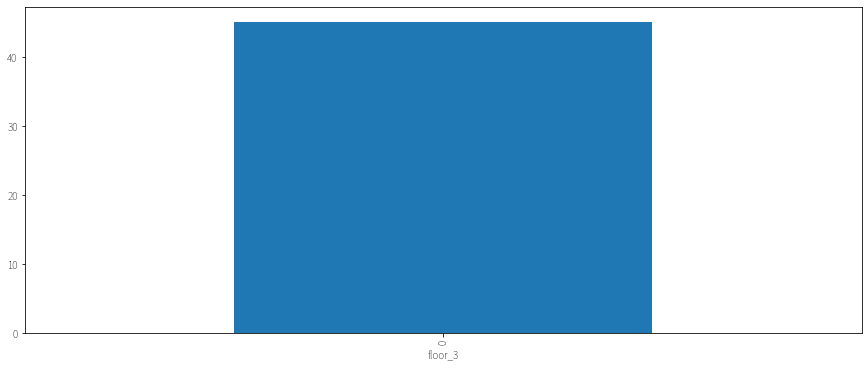

In [49]:
df[df["k_class"]==4].groupby("floor_3").size().plot.bar()

In [50]:
df[df["k_class"]==4]

,no,name,usage,place,floor_area,floor,structure_type,pref_code,country_code,floor_1,floor_2,floor_3,k_class
31,79 09A333B,順天堂本郷地区再編事業（実施設計）,病院施設,東京都文京区,45385.87,3-21-0,S造,13,392,3,21,0,4
33,74S09A004,すがお内科クリニック新築工事,病院施設,福岡県福岡市城南区,223.00,0-2-0,RC造,40,392,0,2,0,4
59,74 10B033,やましたクリニック計画,病院施設,福岡県福岡市博多区,2589.62,0-5-0,RC造,40,392,0,5,0,4
88,72 08B041A,中央内科クリニック整備計画,病院施設,広島県呉市,3971.00,0-4-0,RC造,34,392,0,4,0,4
99,79 09B150B,セコム新東京病院移転新築工事,病院施設,千葉県松戸市,24910.84,0-7-1,RC造,12,392,0,7,0,4
119,79 10B087A,眞仁会三浦シーサイドクリニック移転新築工,病院施設,神奈川県三浦市,2139.90,0-3-0,RC造,14,392,0,3,0,4
143,74 09B041,住田病院グループホームデイケア新築工事,病院施設,福岡県北九州市若松区,777.00,0-1-0,S造,40,392,0,1,0,4
173,72 09B018A,（仮称）ハートフルハウス新築計画,病院施設,広島県廿日市市,1818.79,0-3-0,RC造,34,392,0,3,0,4
175,79 09B150C,セコム新東京病院別枠工事,病院施設,千葉県松戸市,24137.00,0-7-0,RC造,12,392,0,7,0,4
180,79 11A137C,船橋総合病院移転新築工事,病院施設,千葉県船橋市,13049.92,0-5-1,RC造,12,392,0,5,0,4


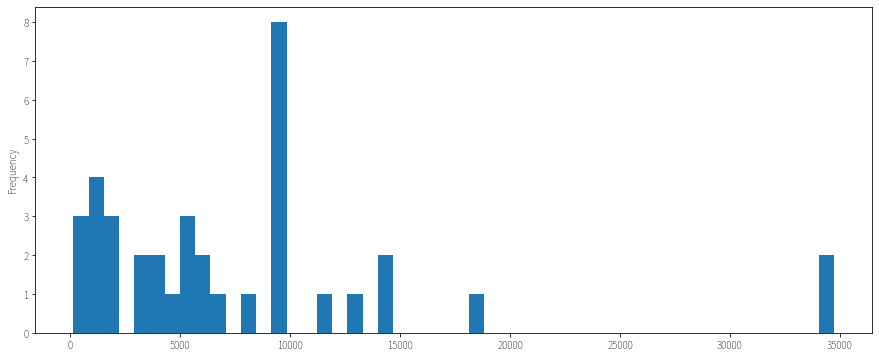

In [51]:
df[df["k_class"]==5]["floor_area"].plot.hist(bins=50)

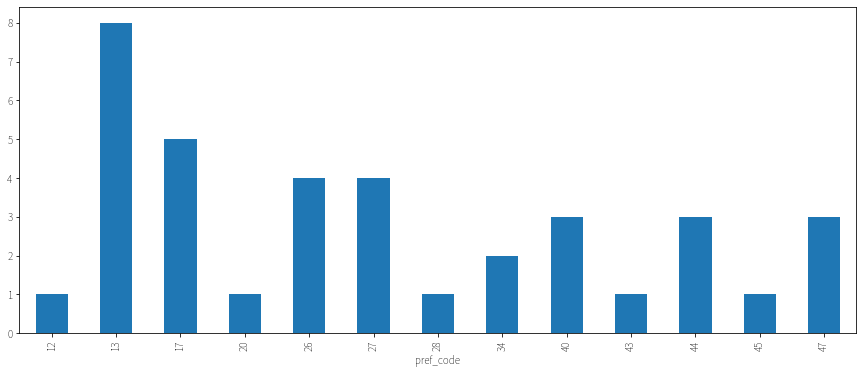

In [52]:
df[df["k_class"]==5].groupby("pref_code").size().plot.bar()

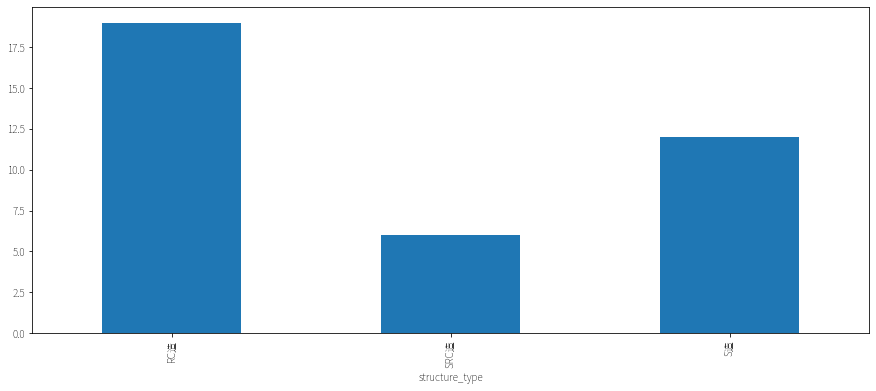

In [53]:
df[df["k_class"]==5].groupby("structure_type").size().plot.bar()

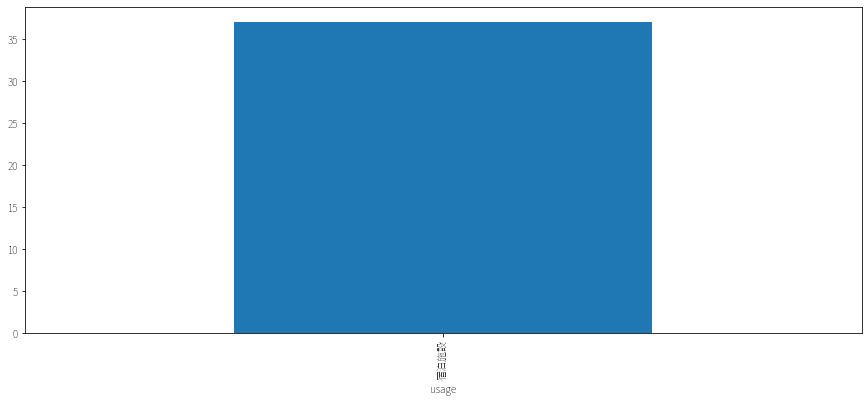

In [54]:
df[df["k_class"]==5].groupby("usage").size().plot.bar()

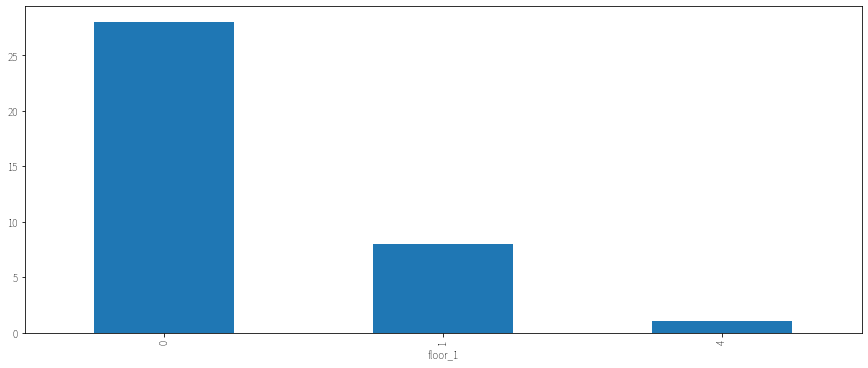

In [55]:
df[df["k_class"]==5].groupby("floor_1").size().plot.bar()

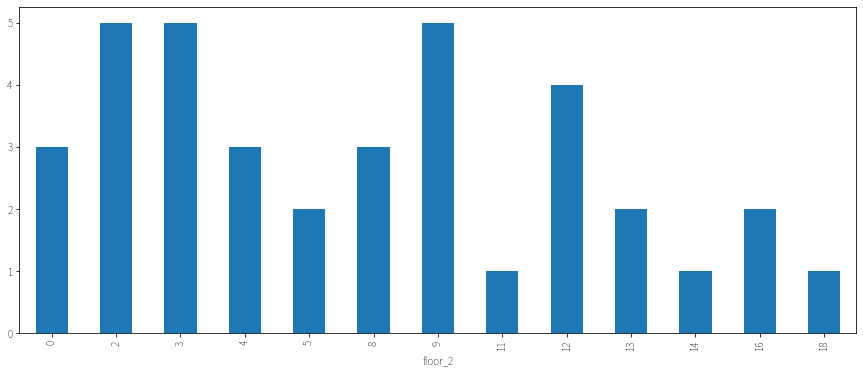

In [56]:
df[df["k_class"]==5].groupby("floor_2").size().plot.bar()

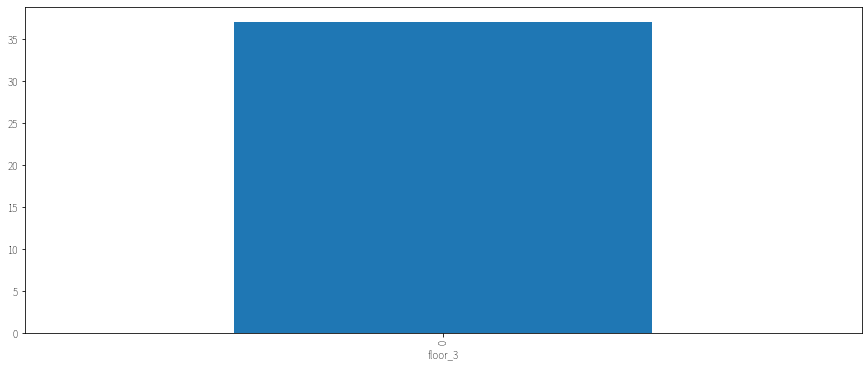

In [57]:
df[df["k_class"]==5].groupby("floor_3").size().plot.bar()

In [58]:
df[df["k_class"]==5]

,no,name,usage,place,floor_area,floor,structure_type,pref_code,country_code,floor_1,floor_2,floor_3,k_class
81,79 09B418A,チェックイン新橋第３ホテル新築工事,宿泊施設,東京都港区,1326.88,1-12-0,S造,13,392,1,12,0,5
133,75 09A055,金沢学院第３清鐘寮新築計画,宿泊施設,石川県金沢市,4113.00,0-0-0,S造,17,392,0,0,0,5
150,79 10A660A,軽井沢新村明義邸新築計画,宿泊施設,長野県北佐久郡軽井沢町,330.60,1-2-0,RC造,20,392,1,2,0,5
333,74 12A033,オムロン錬成館増築及び改修工事,宿泊施設,熊本山鹿,900.00,0-3-0,RC造,43,392,0,3,0,5
346,72 12A051,（仮称）みろくＮＴＣ宿泊ロッジ新築工事,宿泊施設,広島福山,1615.36,0-2-0,S造,34,392,0,2,0,5
351,74 12A064,ホテルオリオンモトブ計画ＶＥ・ＣＤ,宿泊施設,沖縄国頭郡本部町,34751.00,0-12-0,SRC造,47,392,0,12,0,5
381,71 10B1003,三井不動産中之島ホテル計画,宿泊施設,大阪府大阪市中央区,12742.00,1-16-0,RC造,27,392,1,16,0,5
469,74 13B001,那覇国際通りプロジェクト,宿泊施設,沖縄県那覇市,6257.00,0-11-0,RC造,47,392,0,11,0,5
510,79 14A082B,銀座７丁目計画（設計監理）,宿泊施設,東京都中央区,6984.00,0-13-0,S造,13,392,0,13,0,5
517,74 13B059,宮崎市橘通西２丁目開発計画,宿泊施設,宮崎県宮崎市,5305.33,0-12-0,RC造,45,392,0,12,0,5


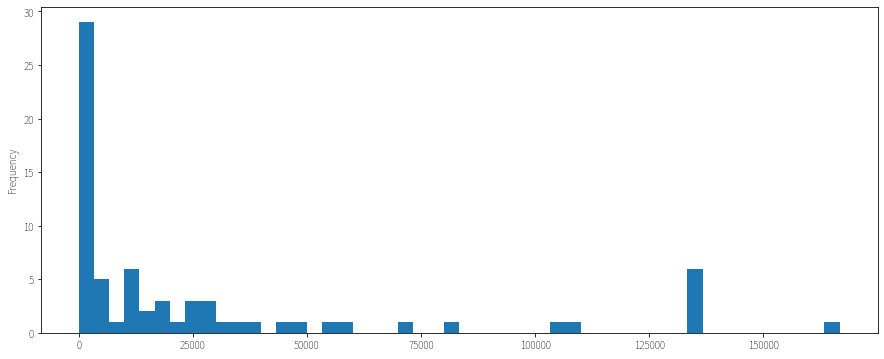

In [59]:
df[df["k_class"]==6]["floor_area"].plot.hist(bins=50)

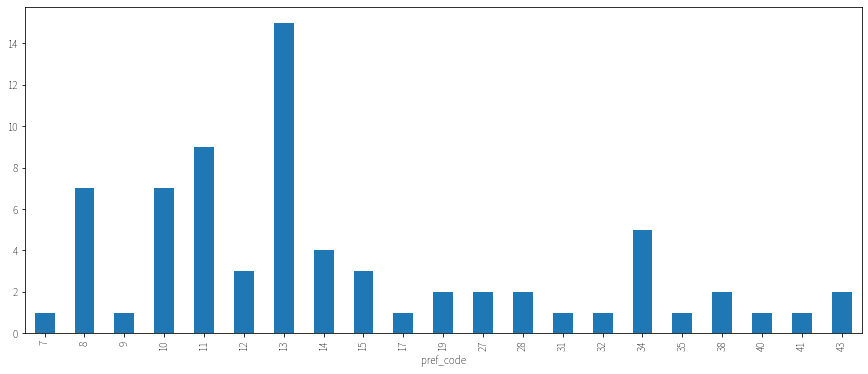

In [60]:
df[df["k_class"]==6].groupby("pref_code").size().plot.bar()

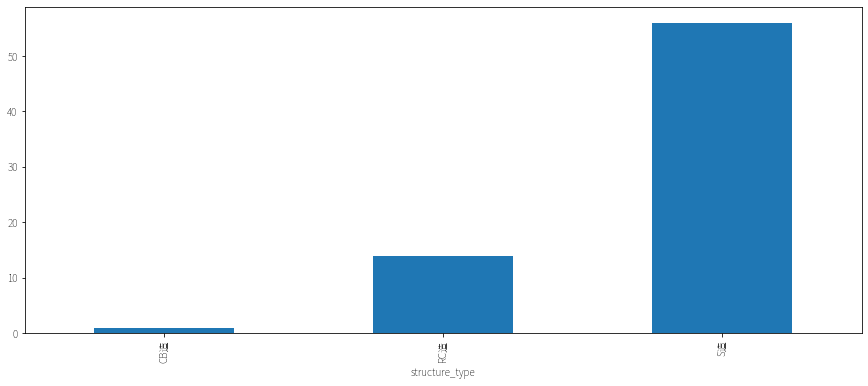

In [61]:
df[df["k_class"]==6].groupby("structure_type").size().plot.bar()

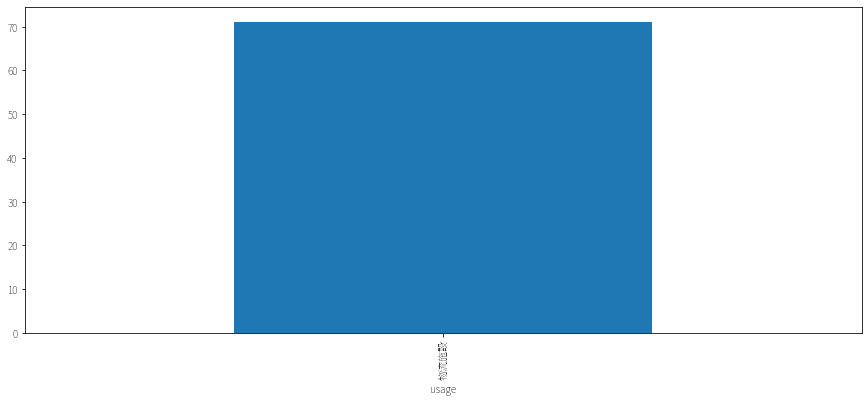

In [62]:
df[df["k_class"]==6].groupby("usage").size().plot.bar()

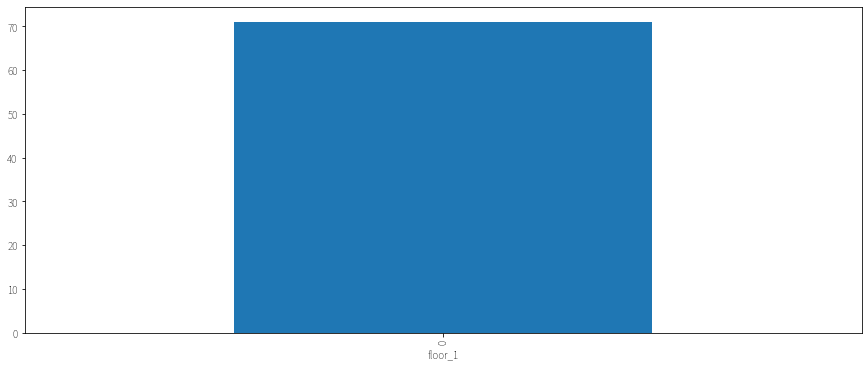

In [63]:
df[df["k_class"]==6].groupby("floor_1").size().plot.bar()

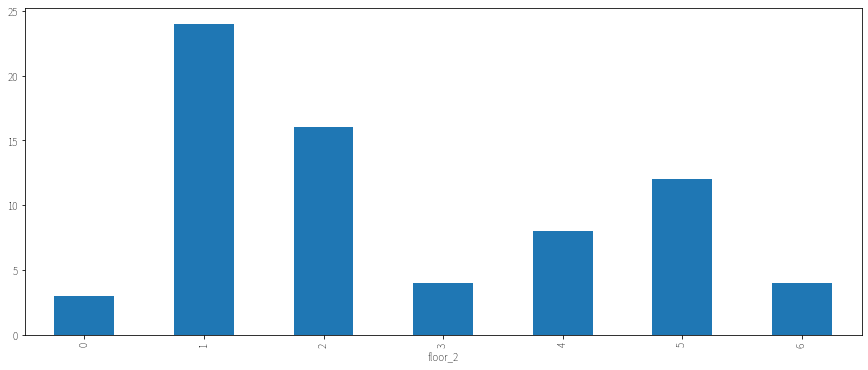

In [64]:
df[df["k_class"]==6].groupby("floor_2").size().plot.bar()

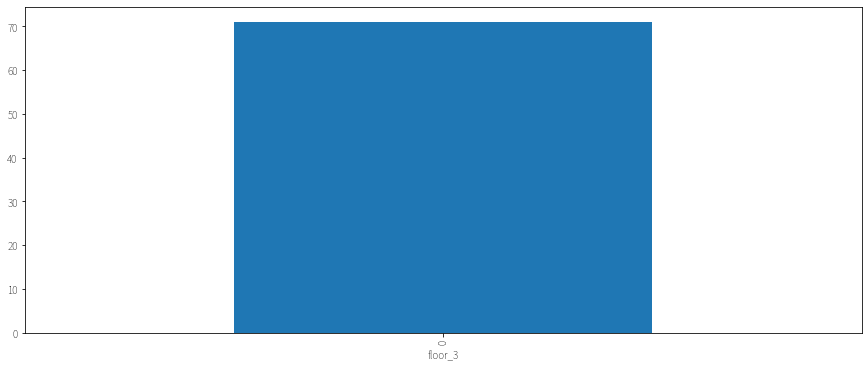

In [65]:
df[df["k_class"]==6].groupby("floor_3").size().plot.bar()

In [66]:
df[df["k_class"]==6]

,no,name,usage,place,floor_area,floor,structure_type,pref_code,country_code,floor_1,floor_2,floor_3,k_class
8,79 09A556A,※東邦薬品熊本物流センター計画,物流施設,熊本県荒尾市,15278.40,0-2-0,RC造,43,392,0,2,0,6
28,79 09A293A,東邦薬品埼玉物流センター計画,物流施設,埼玉県南埼玉郡菖蒲町,26000.00,0-3-0,S造,11,392,0,3,0,6
29,79 07B471B,プロロジスパーク埼玉川島Ⅱ期,物流施設,埼玉県比企郡川島町,166659.70,0-5-1,RC造,11,392,0,5,0,6
34,64 09A021,宇野株式会社関東物流センター新築工事,物流施設,栃木県栃木市,4146.56,0-2-0,S造,9,392,0,2,0,6
35,75 09A005,信越化学工業直江津工場セルロース製品倉庫,物流施設,新潟県上越市,2124.00,0-1-0,S造,15,392,0,1,0,6
44,74 09A017,オーム電機鳥栖配送センター計画,物流施設,佐賀県鳥栖市,8460.00,0-4-0,S造,41,392,0,4,0,6
71,71 09B071,神鋼高砂テント倉庫新設計画,物流施設,兵庫県高砂市,691.00,0-1-0,S造,28,392,0,1,0,6
138,79 10B207A,丸運京浜島物流センター建設工事,物流施設,東京都大田区,18320.00,0-5-0,S造,13,392,0,5,0,6
151,79 10A699A,花王厚木ロジスティクスセンター新築工事,物流施設,神奈川県愛甲郡愛川町,33220.54,0-5-1,S造,14,392,0,5,0,6
160,75 10B001,北陸大池運送白山センター建設計画,物流施設,石川県白山市鹿島町2号30,5040.00,0-2-0,S造,17,392,0,2,0,6


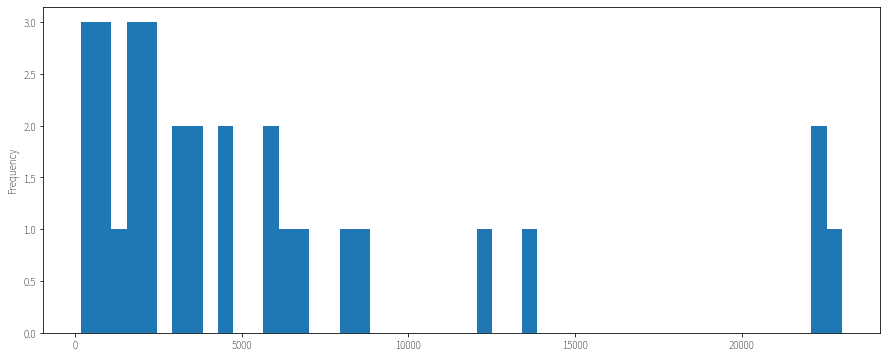

In [67]:
df[df["k_class"]==7]["floor_area"].plot.hist(bins=50)

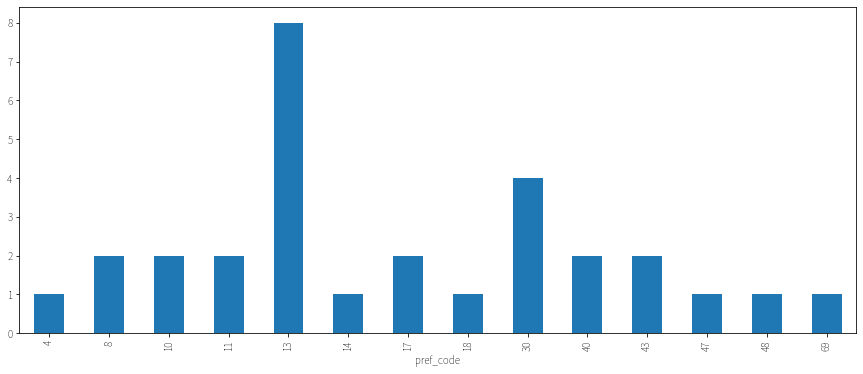

In [68]:
df[df["k_class"]==7].groupby("pref_code").size().plot.bar()

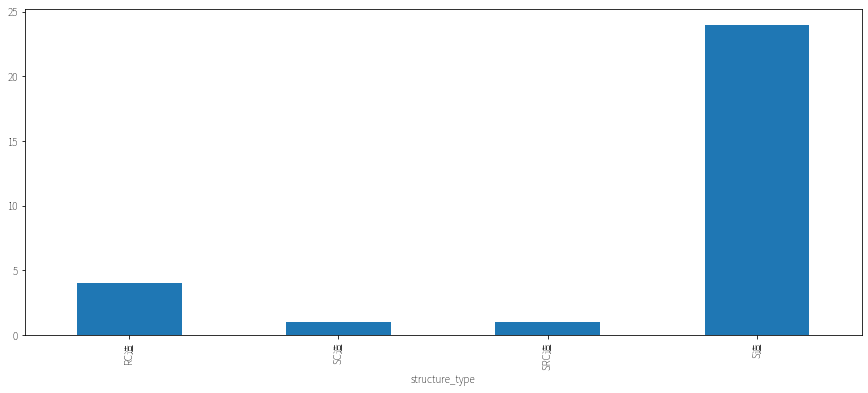

In [69]:
df[df["k_class"]==7].groupby("structure_type").size().plot.bar()

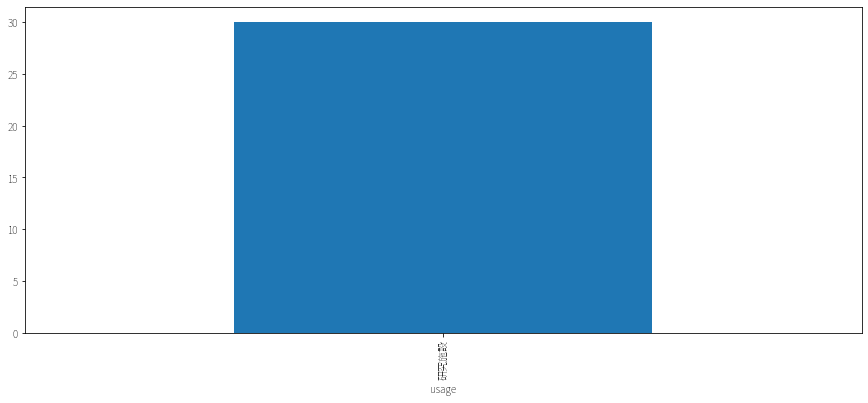

In [70]:
df[df["k_class"]==7].groupby("usage").size().plot.bar()

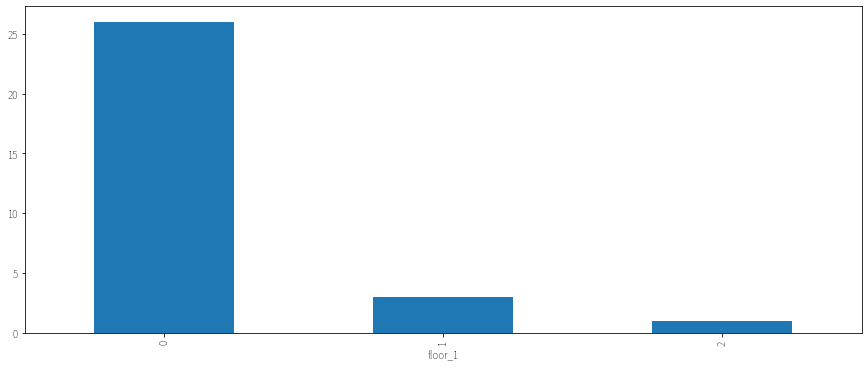

In [71]:
df[df["k_class"]==7].groupby("floor_1").size().plot.bar()

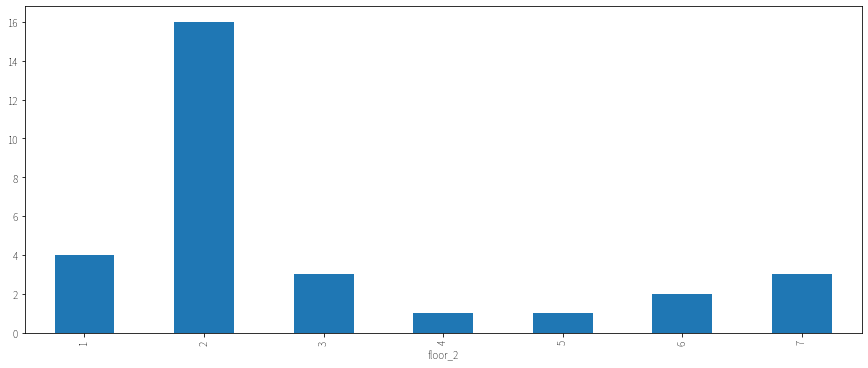

In [72]:
df[df["k_class"]==7].groupby("floor_2").size().plot.bar()

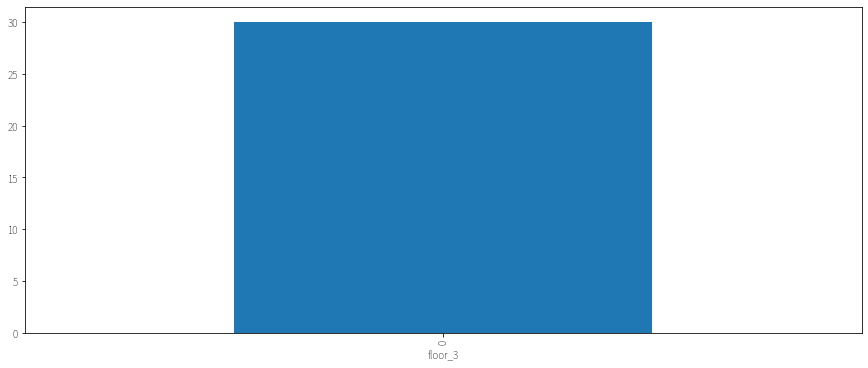

In [73]:
df[df["k_class"]==7].groupby("floor_3").size().plot.bar()

In [74]:
df[df["k_class"]==7]

,no,name,usage,place,floor_area,floor,structure_type,pref_code,country_code,floor_1,floor_2,floor_3,k_class
0,79 07B198B,（仮称）ＨＴＣ技術センター新築工事,研究施設,神奈川県横浜市都筑区,22214.97,1-6-0,SC造,14,392,1,6,0,7
6,79 09A540A,花王和歌山新研究施設建設計画,研究施設,和歌山県和歌山市,22234.09,0-7-2,S造,30,392,0,7,0,7
7,79 09A540C,花王和歌山新研究施設建設計画（温室）,研究施設,和歌山県和歌山市,2361.00,0-3-0,S造,30,392,0,3,0,7
17,93 09A039,コベルコ建機インド新工場建設工事,研究施設,海外インド SRI-CITY,5992.00,0-2-0,SRC造,48,356,0,2,0,7
41,93 09A013,常州ピジョン新工場新築工事,研究施設,海外中国 江蘇省,13800.00,0-2-0,RC造,69,156,0,2,0,7
53,79 10A432B,ＡＤＥＫＡ浦和新研究棟建設工事,研究施設,埼玉県さいたま市南区,7017.04,0-7-0,RC造,11,392,0,7,0,7
56,79 03B790F,オリンパス石川再開発共用棟新築工事,研究施設,東京都八王子市,3239.00,0-2-0,RC造,13,392,0,2,0,7
70,79 09A540F,花王和歌山新研究施設建設計画（外構・植栽,研究施設,和歌山県和歌山市,2361.00,0-3-0,S造,30,392,0,3,0,7
104,79 09A540D,花王和歌山新研究施設建設計画（変更対応）,研究施設,和歌山県和歌山市,23000.00,0-7-0,S造,30,392,0,7,0,7
118,64 09B065,マックス玉村新開発棟計画,研究施設,群馬県佐波郡玉村町川井1848,8673.00,0-3-0,S造,10,392,0,3,0,7


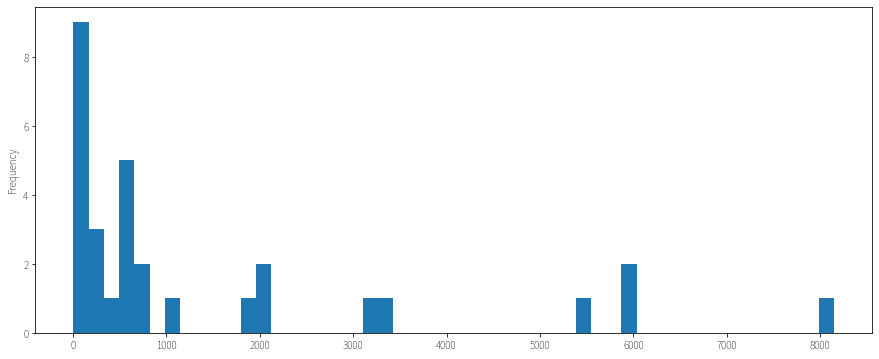

In [75]:
df[df["k_class"]==8]["floor_area"].plot.hist(bins=50)

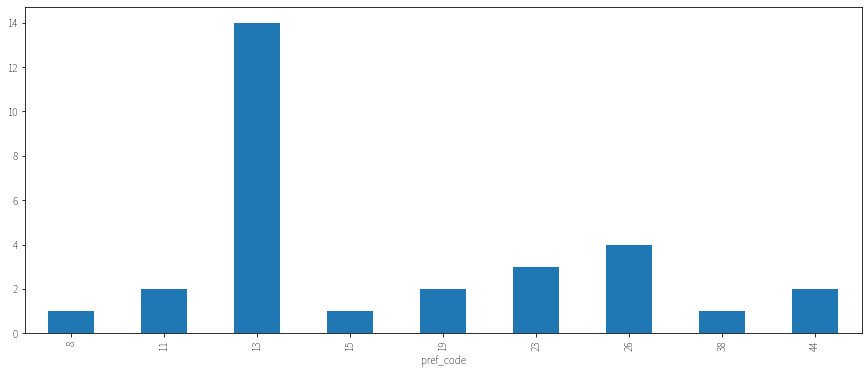

In [76]:
df[df["k_class"]==8].groupby("pref_code").size().plot.bar()

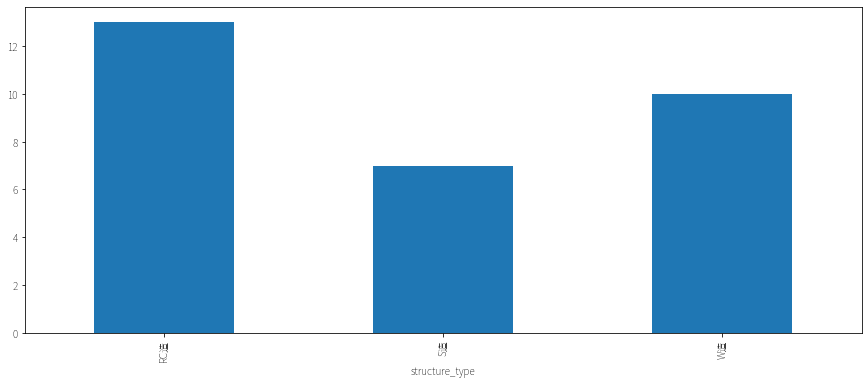

In [77]:
df[df["k_class"]==8].groupby("structure_type").size().plot.bar()

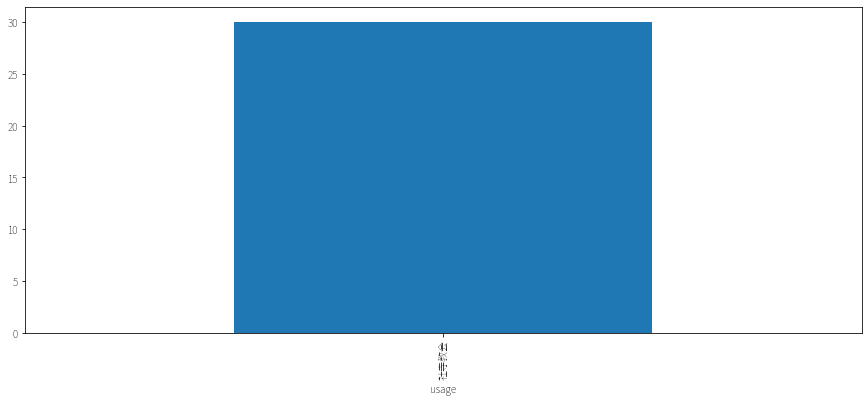

In [78]:
df[df["k_class"]==8].groupby("usage").size().plot.bar()

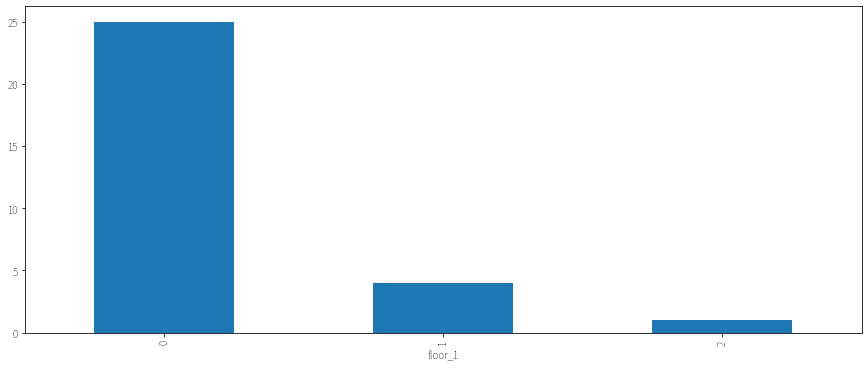

In [79]:
df[df["k_class"]==8].groupby("floor_1").size().plot.bar()

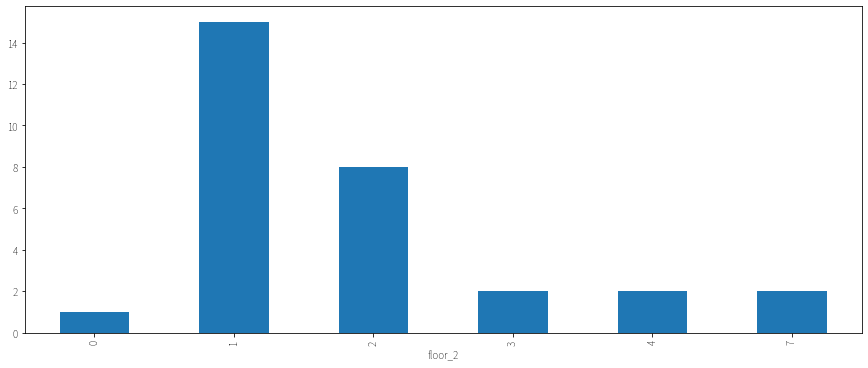

In [80]:
df[df["k_class"]==8].groupby("floor_2").size().plot.bar()

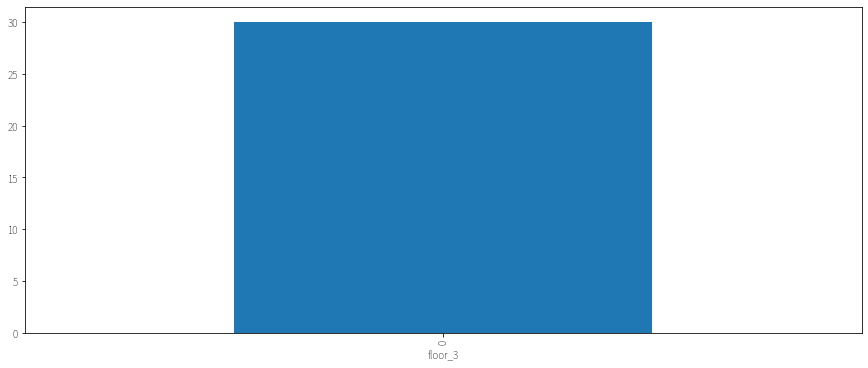

In [81]:
df[df["k_class"]==8].groupby("floor_3").size().plot.bar()

In [82]:
df[df["k_class"]==8]

,no,name,usage,place,floor_area,floor,structure_type,pref_code,country_code,floor_1,floor_2,floor_3,k_class
2,79 09A245A,八幡大神社楼門新築計画,社寺教会,東京都三鷹市,30.12,0-1-0,W造,13,392,0,1,0,8
23,79 07B503C,目黒不動尊瀧泉寺供養塔新築工事,社寺教会,東京都目黒区,3.98,0-1-0,RC造,13,392,0,1,0,8
46,74 09A034,大分サレジアンシスターズ修道院聖堂改築,社寺教会,大分県大分市,2104.75,0-3-0,RC造,44,392,0,3,0,8
51,79 09B550A,武蔵一宮氷川神社祈祷殿・神札所新築工事,社寺教会,埼玉県さいたま市大宮区,690.12,0-1-0,W造,11,392,0,1,0,8
63,79 08A396B,宗教法人大本教大道場講堂・新大本会館計画,社寺教会,京都府亀岡市,6012.34,0-4-0,RC造,26,392,0,4,0,8
76,79 09A115B,大本大道場講堂新築工事,社寺教会,京都府亀岡市,559.04,0-1-0,S造,26,392,0,1,0,8
84,79 10B141A,大仙寺本堂・客殿・庫裏新築工事,社寺教会,新潟県新潟市中央区,1110.64,0-2-0,RC造,15,392,0,2,0,8
102,79 08A396C,宗教法人大本教大道場講堂・新大本会館計画,社寺教会,京都府亀岡市,40.00,0-0-0,S造,26,392,0,0,0,8
126,79 10B355A,本門佛立宗宗務本庁舎建替計画,社寺教会,京都府京都市上京区,3391.50,1-4-0,RC造,26,392,1,4,0,8
127,79 09B370A,穴八幡宮鼓楼新築工事,社寺教会,東京都新宿区,37.03,0-1-0,W造,13,392,0,1,0,8


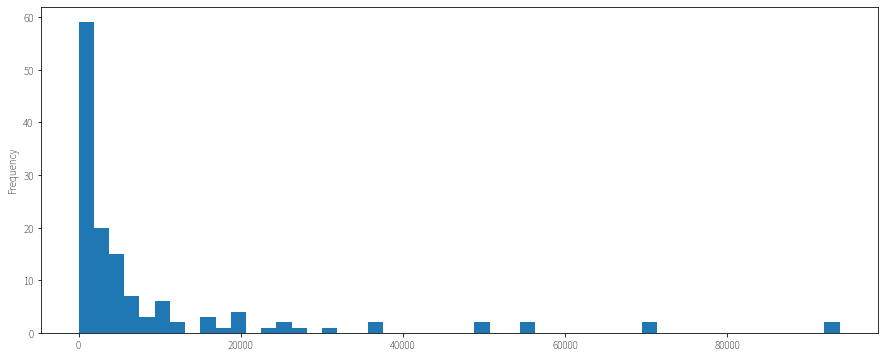

In [83]:
df[df["k_class"]==9]["floor_area"].plot.hist(bins=50)

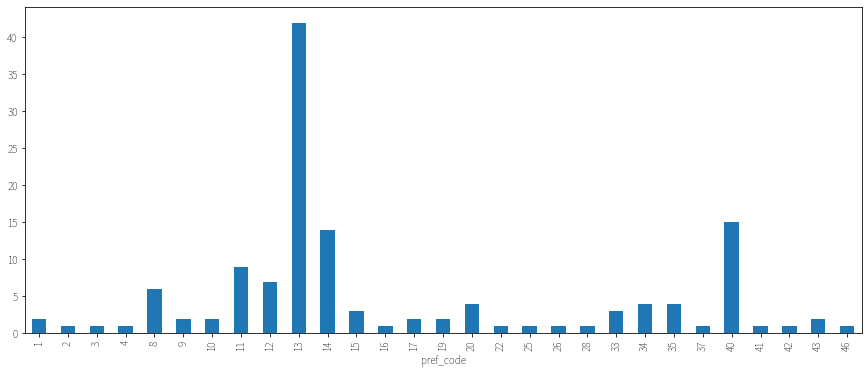

In [84]:
df[df["k_class"]==9].groupby("pref_code").size().plot.bar()

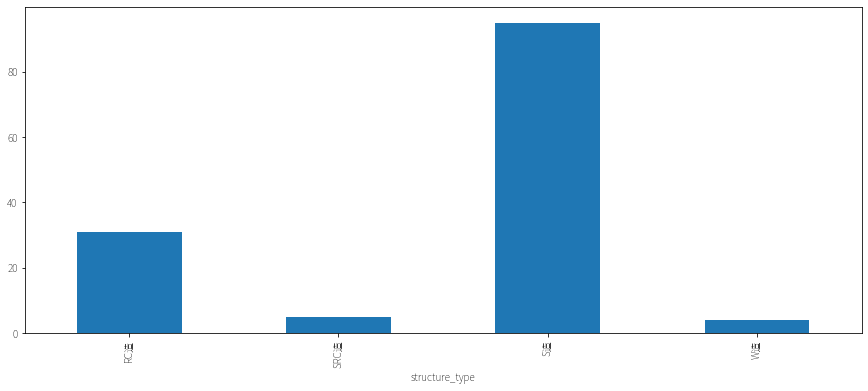

In [85]:
df[df["k_class"]==9].groupby("structure_type").size().plot.bar()

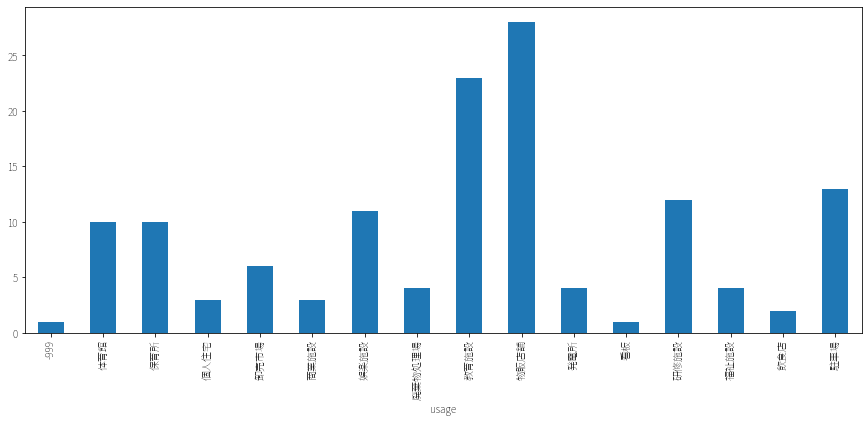

In [86]:
df[df["k_class"]==9].groupby("usage").size().plot.bar()

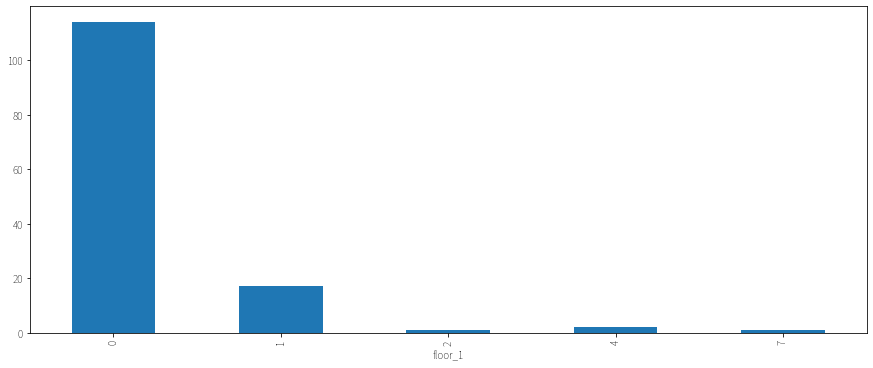

In [87]:
df[df["k_class"]==9].groupby("floor_1").size().plot.bar()

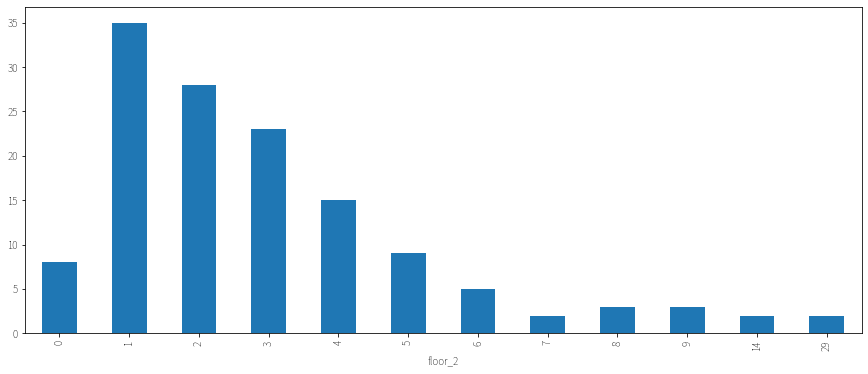

In [88]:
df[df["k_class"]==9].groupby("floor_2").size().plot.bar()

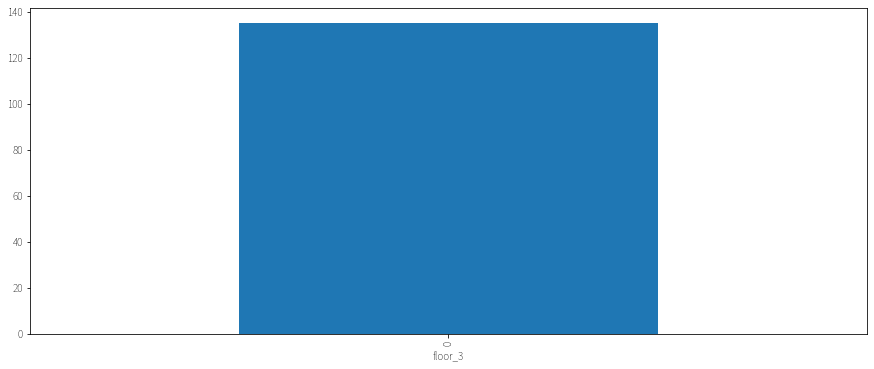

In [89]:
df[df["k_class"]==9].groupby("floor_3").size().plot.bar()

In [90]:
df[df["k_class"]==9]

,no,name,usage,place,floor_area,floor,structure_type,pref_code,country_code,floor_1,floor_2,floor_3,k_class
10,79 04A763E,島忠調布店新築工事（工期延長後）,物販店舗,東京都調布市,50000.00,0-6-0,S造,13,392,0,6,0,9
13,79 04A763D,島忠調布店新築工事（テナント対応）,物販店舗,東京都調布市,50000.00,0-6-0,S造,13,392,0,6,0,9
14,79 08A148B,イオンモール甲府昭和町ＳＣジャスコＢ工事,物販店舗,山梨県中巨摩郡昭和町,70657.00,0-3-0,S造,19,392,0,3,0,9
16,79 09A255B,伊豆ベロドローム建設計画,娯楽施設,静岡県伊豆市,12905.00,1-3-0,RC造,22,392,1,3,0,9
24,79 08A148E,イオンモール甲府昭和町ＳＣ（熱源受託工事,物販店舗,山梨県中巨摩郡昭和町,70657.00,0-3-0,RC造,19,392,0,3,0,9
25,74 09A011,ゆめマートうきは新築工事,物販店舗,福岡県うきは市,9934.91,0-1-0,S造,40,392,0,1,0,9
36,74 09A054,ふたば幼稚園子育て支援施設計画,保育所,佐賀県佐賀市,300.00,0-1-0,RC造,41,392,0,1,0,9
47,79 09B524C,小田急相武台ビル（店舗棟）工事,物販店舗,神奈川県座間市,8045.74,0-5-0,S造,14,392,0,5,0,9
48,79 09B524D,小田急相武台ビル（駐車場棟）工事,物販店舗,神奈川県座間市,3290.23,0-3-1,S造,14,392,0,3,0,9
49,79 09B524B,小田急相武台ビル（仮設店舗）工事,物販店舗,神奈川県座間市,10998.00,0-4-0,S造,14,392,0,4,0,9


In [91]:
df.groupby("usage").size()

usage
-999        1
事務所       159
体育館        10
保育所        10
個人住宅        3
卸売市場        6
商業施設        3
大学         44
娯楽施設       11
宿泊施設       37
廃棄物処理場      4
教育施設       23
物流施設       71
物販店舗       28
生産施設      225
病院施設       45
発電所         4
看板          1
研修施設       12
研究施設       30
社寺教会       30
福祉施設        4
集合住宅       61
飲食店         2
駐車場        13
dtype: int64